# Telecom Churn Case Study
### Steps:-
1. Data Preparation
2. Data Cleaning
3. Exploratory Data Analysis
4. Random Forest Model for getting important variables
5. Logistic Regression model for interpretability
6. Business Recommendations
7. Decision Tree for interpretation
8. Principal Component Analysis for dimensionality reduction
9. Ensemble models for improved accuracy

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/telecom-churn-case-study-hackathon-c35/sample (2).csv
/kaggle/input/telecom-churn-case-study-hackathon-c35/data_dictionary (1).csv
/kaggle/input/telecom-churn-case-study-hackathon-c35/train (1).csv
/kaggle/input/telecom-churn-case-study-hackathon-c35/test (1).csv


In [2]:
df = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-c35/train (1).csv")
test_df = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-c35/test (1).csv")

df.shape, test_df.shape

((69999, 172), (30000, 171))

- We have train and test data separately
- We will do the analysis on train data and apply the same transformations to the test data also

### Data Understanding

In [3]:
# to display all the columns at once

pd.options.display.max_columns = 200

df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [4]:
data_dict = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-c35/data_dictionary (1).csv")

data_dict.shape

(36, 2)

In [5]:
# to display all the columns of data dictionary at once

pd.options.display.max_rows = 36

# to display full text of data dictionary at once

pd.options.display.max_colwidth = 500

data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belongs to
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile to mobile
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [6]:
# for code autocompletion

%config Completer.use_jedi = False

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [8]:
# columns which are object type

df.columns[df.dtypes == "object"]

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

All the object type columns are date columns

In [9]:
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belongs to
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile to mobile
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [10]:
# to display all the entries of a list

pd.options.display.max_seq_items = 200 

In [11]:
df.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8

#### Identifying potentially relevant variables to do the analysis on.

In [12]:
cols = ['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_8',  'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'churn_probability']

cols_test = ['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_8',  'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g']

In [13]:
df = df[cols]
test_df = test_df[cols_test]
df.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,81.21,221.68,3.63,11.84,53.04,40.56,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,30.73,31.66,3.44,39.44,25.04,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,0.0,352.91,0.00,0.0,3.96,0.0,NaN,122.07,NaN,NaN,122.08,NaN,710,0.0,0.0,0.0,0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,56.49,99.36,0.00,124.29,33.83,36.64,2,4,2,70,120,0,70,70,0,6/11/2014,7/22/2014,8/24/2014,70,50,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,76.03,95.98,53.84,95.11,50.18,83.84,2,4,3,160,240,130,110,110,50,6/15/2014,7/21/2014,8/25/2014,110,110,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,63.26,42.94,15.76,21.54,9.36,28.31,13,10,8,290,136,122,50,41,30,6/25/2014,7/26/2014,8/30/2014,25,10,30,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,390.8,308.89,213.47,0.0,0.00,0.0,0.0,35.00,0.0,0.0,35.12,0.0,647,0.0,0.0,0.0,0


In [14]:
len(cols)

57

### Data Cleaning

#### Missing values Imputation

In [15]:
# to display all the rows at once

pd.options.display.max_rows=70

(df.isna().sum() / df.shape[0] * 100).sort_values()

id                      0.000000
total_rech_amt_8        0.000000
max_rech_amt_6          0.000000
max_rech_amt_7          0.000000
max_rech_amt_8          0.000000
jun_vbc_3g              0.000000
last_day_rch_amt_7      0.000000
last_day_rch_amt_8      0.000000
total_rech_amt_7        0.000000
vol_2g_mb_6             0.000000
vol_2g_mb_8             0.000000
vol_3g_mb_6             0.000000
vol_3g_mb_7             0.000000
vol_3g_mb_8             0.000000
aon                     0.000000
aug_vbc_3g              0.000000
jul_vbc_3g              0.000000
vol_2g_mb_7             0.000000
total_rech_amt_6        0.000000
last_day_rch_amt_6      0.000000
total_rech_num_7        0.000000
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
total_rech_num_8        0.000000
total_og_mou_6          0.000000
total_og_mou_7          0.000000
total_og_mou_8          0.000000
churn_probability       0.000000
total_rech_num_6        0.000000
total_ic_m

In [16]:
# we can fill majority of columns with 0 because lack of recharge means 0 recharge both in terms of revenue and count

cols_to_be_filled_with_0_at_NA = [
    "count_rech_2g_6", "max_rech_data_6", "count_rech_3g_6", "arpu_3g_6",
    "arpu_2g_6", "arpu_2g_7", "max_rech_data_7", "count_rech_2g_7", "count_rech_3g_7",
    "arpu_3g_7", "max_rech_data_8", "count_rech_2g_8", "count_rech_3g_8", "arpu_3g_8",
    "arpu_2g_8"
]

In [17]:
# filling the missing values with 0

df[cols_to_be_filled_with_0_at_NA] = df[cols_to_be_filled_with_0_at_NA].fillna(0)
test_df[cols_to_be_filled_with_0_at_NA] = test_df[cols_to_be_filled_with_0_at_NA].fillna(0)

In [18]:
(df.isna().sum() / df.shape[0] * 100).sort_values()

id                     0.000000
last_day_rch_amt_8     0.000000
max_rech_data_6        0.000000
max_rech_data_7        0.000000
max_rech_data_8        0.000000
count_rech_2g_6        0.000000
count_rech_2g_7        0.000000
count_rech_2g_8        0.000000
count_rech_3g_6        0.000000
count_rech_3g_7        0.000000
count_rech_3g_8        0.000000
vol_2g_mb_6            0.000000
vol_2g_mb_7            0.000000
vol_2g_mb_8            0.000000
vol_3g_mb_6            0.000000
vol_3g_mb_7            0.000000
vol_3g_mb_8            0.000000
arpu_3g_6              0.000000
arpu_3g_7              0.000000
arpu_3g_8              0.000000
arpu_2g_6              0.000000
arpu_2g_7              0.000000
arpu_2g_8              0.000000
aon                    0.000000
aug_vbc_3g             0.000000
jul_vbc_3g             0.000000
last_day_rch_amt_7     0.000000
jun_vbc_3g             0.000000
last_day_rch_amt_6     0.000000
total_ic_mou_6         0.000000
arpu_6                 0.000000
arpu_7  

- for offnet and onnet columns of different months, missing values can mean that there's no mou (minutes of usage)
- let's impute the missing values with 0 in this case also

In [19]:
off_onn_net_cols = [
    "offnet_mou_7", "onnet_mou_7", "offnet_mou_6",
    "onnet_mou_6", "offnet_mou_8", "onnet_mou_8"
]

In [20]:
df[off_onn_net_cols] = df[off_onn_net_cols].fillna(0)
test_df[off_onn_net_cols] = test_df[off_onn_net_cols].fillna(0)

- now only the date columns have missing values 
- we'll first convert the date columns to just contain the day(1 to 31) because the columns are already separated based on the months
- if the values are missing for date columns that just means no recharge was done, assuming the data was collected appropriately
- we can either replace it with 0 or the median day
- let's go with zero because it will totally eliminate this feature for the sample

In [21]:
date_cols = ["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8"]

df[date_cols].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,6/22/2014,7/10/2014,8/24/2014
1,6/12/2014,7/10/2014,8/26/2014
2,6/11/2014,7/22/2014,8/24/2014
3,6/15/2014,7/21/2014,8/25/2014
4,6/25/2014,7/26/2014,8/30/2014


In [22]:
# converting the column to datetime format

df.date_of_last_rech_6 = pd.to_datetime(df.date_of_last_rech_6, format="%m/%d/%Y")
df.date_of_last_rech_7 = pd.to_datetime(df.date_of_last_rech_7, format="%m/%d/%Y")
df.date_of_last_rech_8 = pd.to_datetime(df.date_of_last_rech_8, format="%m/%d/%Y")

test_df.date_of_last_rech_6 = pd.to_datetime(test_df.date_of_last_rech_6, format="%m/%d/%Y")
test_df.date_of_last_rech_7 = pd.to_datetime(test_df.date_of_last_rech_7, format="%m/%d/%Y")
test_df.date_of_last_rech_8 = pd.to_datetime(test_df.date_of_last_rech_8, format="%m/%d/%Y")

df[date_cols].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,2014-06-22,2014-07-10,2014-08-24
1,2014-06-12,2014-07-10,2014-08-26
2,2014-06-11,2014-07-22,2014-08-24
3,2014-06-15,2014-07-21,2014-08-25
4,2014-06-25,2014-07-26,2014-08-30


In [23]:
# a function which returns the day of the date

def date_to_day(x):
    return x.day

In [24]:
# applying the function to all the date columns

df.date_of_last_rech_6 = df.date_of_last_rech_6.apply(date_to_day)
df.date_of_last_rech_7 = df.date_of_last_rech_7.apply(date_to_day)
df.date_of_last_rech_8 = df.date_of_last_rech_8.apply(date_to_day)

test_df.date_of_last_rech_6 = test_df.date_of_last_rech_6.apply(date_to_day)
test_df.date_of_last_rech_7 = test_df.date_of_last_rech_7.apply(date_to_day)
test_df.date_of_last_rech_8 = test_df.date_of_last_rech_8.apply(date_to_day)

df[date_cols].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,22.0,10.0,24.0
1,12.0,10.0,26.0
2,11.0,22.0,24.0
3,15.0,21.0,25.0
4,25.0,26.0,30.0


In [25]:
# let's change the names of these columns also 

df.columns

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'date_of_last_rech_6',
       'date_of_last_rech_7', 'date_of_last_rech_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6',
       'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_6', 'vol_2g_mb_7',
       'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'aon',
       'au

In [26]:
df.columns = ['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'day_of_last_rech_6',
       'day_of_last_rech_7', 'day_of_last_rech_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6',
       'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_6', 'vol_2g_mb_7',
       'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability']

test_df.columns = ['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'day_of_last_rech_6',
       'day_of_last_rech_7', 'day_of_last_rech_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6',
       'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_6', 'vol_2g_mb_7',
       'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']

df.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,81.21,221.68,3.63,11.84,53.04,40.56,3,2,2,77,65,10,65,65,10,22.0,10.0,24.0,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,1958,0.0,0.0,0.0,0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,30.73,31.66,3.44,39.44,25.04,3,4,5,0,145,50,0,145,50,12.0,10.0,26.0,0,0,0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,0.0,122.07,0.0,0.0,122.08,0.0,710,0.0,0.0,0.0,0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,56.49,99.36,0.00,124.29,33.83,36.64,2,4,2,70,120,0,70,70,0,11.0,22.0,24.0,70,50,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,882,0.0,0.0,0.0,0
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,76.03,95.98,53.84,95.11,50.18,83.84,2,4,3,160,240,130,110,110,50,15.0,21.0,25.0,110,110,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,982,0.0,0.0,0.0,0
4,4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,63.26,42.94,15.76,21.54,9.36,28.31,13,10,8,290,136,122,50,41,30,25.0,26.0,30.0,25,10,30,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,390.8,308.89,213.47,0.0,0.00,0.0,0.0,35.00,0.0,0.0,35.12,0.0,647,0.0,0.0,0.0,0


In [27]:
# imputing the missing values with 0

day_cols = ['day_of_last_rech_6', 'day_of_last_rech_7', 'day_of_last_rech_8']

df[day_cols] = df[day_cols].fillna(0.0)
test_df[day_cols] = df[day_cols].fillna(0.0)

In [28]:
(df.isna().sum() / df.shape[0] * 100).sort_values()

id                    0.0
last_day_rch_amt_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_3g_6       0.0
count_rech_3g_7       0.0
count_rech_3g_8       0.0
vol_2g_mb_6           0.0
vol_2g_mb_7           0.0
vol_2g_mb_8           0.0
vol_3g_mb_6           0.0
vol_3g_mb_7           0.0
vol_3g_mb_8           0.0
arpu_3g_6             0.0
arpu_3g_7             0.0
arpu_3g_8             0.0
arpu_2g_6             0.0
arpu_2g_7             0.0
arpu_2g_8             0.0
aon                   0.0
aug_vbc_3g            0.0
jul_vbc_3g            0.0
last_day_rch_amt_7    0.0
jun_vbc_3g            0.0
last_day_rch_amt_6    0.0
day_of_last_rech_7    0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  69999 non-null  int64  
 1   arpu_6              69999 non-null  float64
 2   arpu_7              69999 non-null  float64
 3   arpu_8              69999 non-null  float64
 4   onnet_mou_6         69999 non-null  float64
 5   onnet_mou_7         69999 non-null  float64
 6   onnet_mou_8         69999 non-null  float64
 7   offnet_mou_6        69999 non-null  float64
 8   offnet_mou_7        69999 non-null  float64
 9   offnet_mou_8        69999 non-null  float64
 10  total_og_mou_6      69999 non-null  float64
 11  total_og_mou_7      69999 non-null  float64
 12  total_og_mou_8      69999 non-null  float64
 13  total_ic_mou_6      69999 non-null  float64
 14  total_ic_mou_7      69999 non-null  float64
 15  total_ic_mou_8      69999 non-null  float64
 16  tota

### Exploratory Data Analysis

#### Univariate Analysis & Outlier Treatment
- we'll also remove the outliers in this analysis
- we'll only remove the outliers if they are not possible/highly unlikely for the given feature
- as removing all the outliers for all the variables will lead to huge loss of data

arpu_6

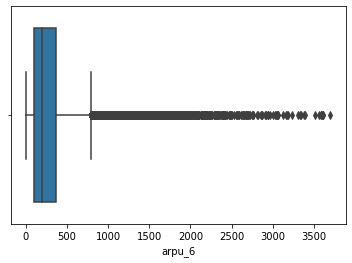

In [30]:
sns.boxplot(df.arpu_6[(df.arpu_6 >= 0) & (df.arpu_6 <= 3900)])
plt.show()

In [31]:
df = df[(df.arpu_6 >= 0) & (df.arpu_6 <= 3900)]

arpu_7

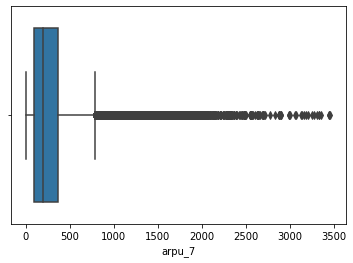

In [32]:
sns.boxplot(df.arpu_7[(df.arpu_7 >= 0) & (df.arpu_7 <= 3500)])
plt.show()

In [33]:
df = df[(df.arpu_7 >= 0) & (df.arpu_7 <= 3500)]

arpu_8

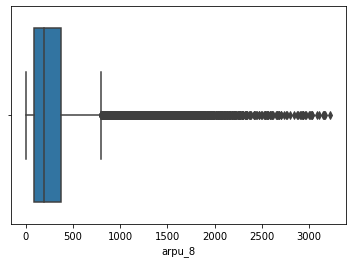

In [34]:
sns.boxplot(df.arpu_8[(df.arpu_8 >= 0) & (df.arpu_8 <= 3300)])
plt.show()

In [35]:
df = df[(df.arpu_8 >= 0) & (df.arpu_8 <= 3300)]

onnet_mou_6

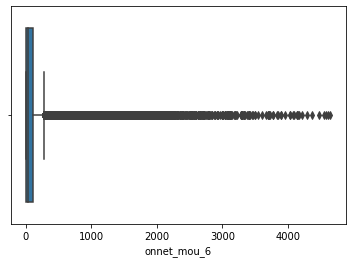

In [36]:
sns.boxplot(df.onnet_mou_6[(df.onnet_mou_6 >= 0) & (df.onnet_mou_6 <= 4900)])
plt.show()

In [37]:
df = df[(df.onnet_mou_6 >= 0) & (df.onnet_mou_6 <= 4900)]

onnet_mou_7

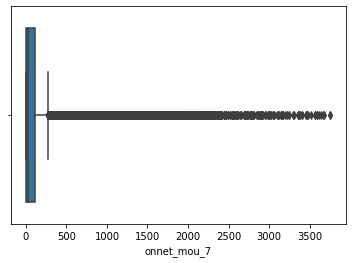

In [38]:
sns.boxplot(df.onnet_mou_7[df.onnet_mou_7 <= 3900])
plt.show()

In [39]:
df = df[df.onnet_mou_7 <= 3900]

onnet_mou_8

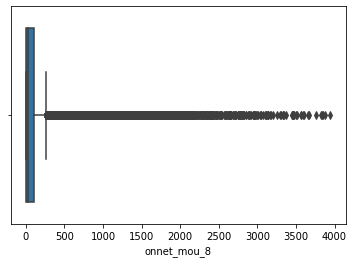

In [40]:
sns.boxplot(df.onnet_mou_8[df.onnet_mou_8 <= 4000])
plt.show()

In [41]:
df = df[df.onnet_mou_8 <= 4000]

offnet_mou_6

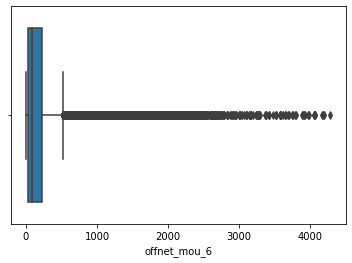

In [42]:
sns.boxplot(df.offnet_mou_6[df.offnet_mou_6 <= 4300])
plt.show()

In [43]:
df = df[df.offnet_mou_6 <= 4300]

offnet_mou_7

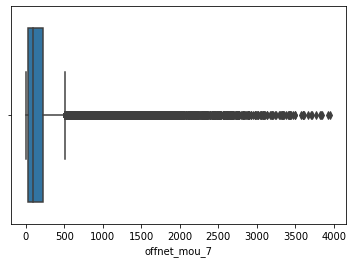

In [44]:
sns.boxplot(df.offnet_mou_7[df.offnet_mou_7 <= 4000])
plt.show()

In [45]:
df = df[df.offnet_mou_7 <= 4000]

offnet_mou_8

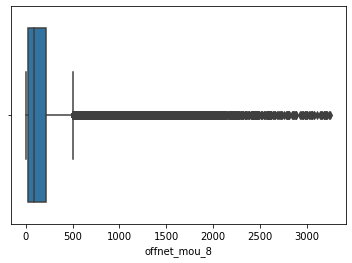

In [46]:
sns.boxplot(df.offnet_mou_8[df.offnet_mou_8 <= 3300])
plt.show()

In [47]:
df = df[df.offnet_mou_8 <= 3300]

total_og_mou_6

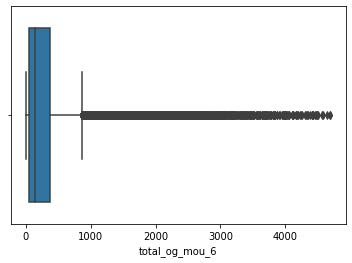

In [48]:
sns.boxplot(df.total_og_mou_6[df.total_og_mou_6 <= 4800])
plt.show()

In [49]:
df = df[df.total_og_mou_6 <= 4800]

total_og_mou_7

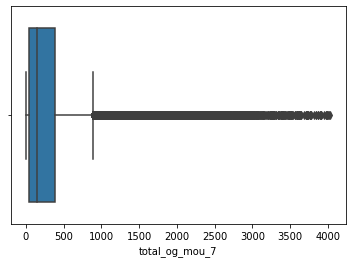

In [50]:
sns.boxplot(df.total_og_mou_7[df.total_og_mou_7 <= 4120])
plt.show()

In [51]:
df = df[df.total_og_mou_7 <= 4120]

total_og_mou_8

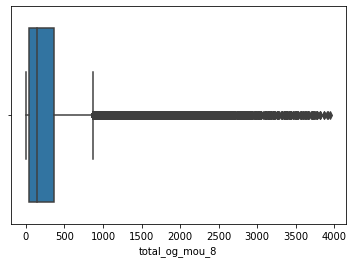

In [52]:
sns.boxplot(df.total_og_mou_8[df.total_og_mou_8 <= 4060])
plt.show()

In [53]:
df = df[df.total_og_mou_8 <= 4060]

total_ic_mou_6

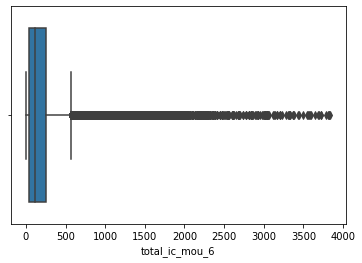

In [54]:
sns.boxplot(df.total_ic_mou_6[df.total_ic_mou_6 <= 3900])
plt.show()

In [55]:
df = df[df.total_ic_mou_6 <= 3900]

total_ic_mou_7

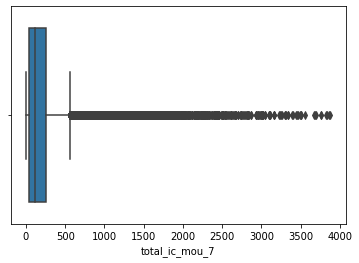

In [56]:
sns.boxplot(df.total_ic_mou_7[df.total_ic_mou_7 <= 4000])
plt.show()

In [57]:
df = df[df.total_ic_mou_7 <= 4000]

total_ic_mou_8

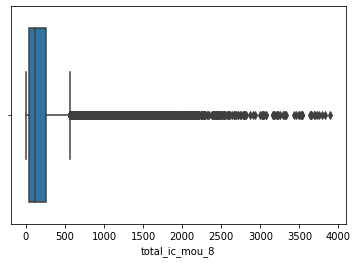

In [58]:
sns.boxplot(df.total_ic_mou_8[df.total_ic_mou_8 <= 3900])
plt.show()

In [59]:
df = df[df.total_ic_mou_8 <= 3900]

total_rech_num_6

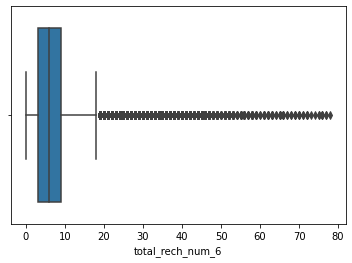

In [60]:
sns.boxplot(df.total_rech_num_6[df.total_rech_num_6 <= 82])
plt.show()

In [61]:
df = df[df.total_rech_num_6 <= 82]

total_rech_num_7

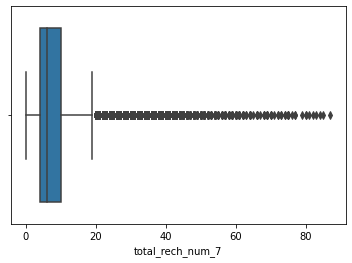

In [62]:
sns.boxplot(df.total_rech_num_7[df.total_rech_num_7 <= 90])
plt.show()

In [63]:
df = df[df.total_rech_num_7 <= 90]

total_rech_num_8

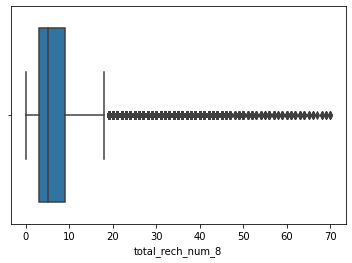

In [64]:
sns.boxplot(df.total_rech_num_8[df.total_rech_num_8 <= 71])
plt.show()

In [65]:
df = df[df.total_rech_num_8 <= 71]

total_rech_amt_6

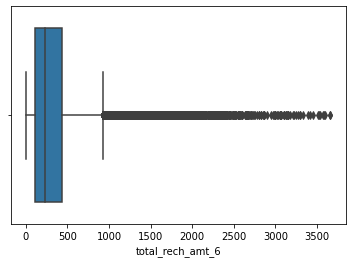

In [66]:
sns.boxplot(df.total_rech_amt_6[df.total_rech_amt_6 <= 3760])
plt.show()

In [67]:
df = df[df.total_rech_amt_6 <= 3760]

total_rech_amt_7

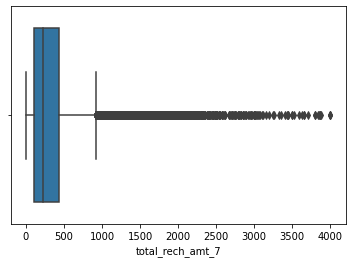

In [68]:
sns.boxplot(df.total_rech_amt_7[df.total_rech_amt_7 <= 4000])
plt.show()

In [69]:
df = df[df.total_rech_amt_7 <= 4000]

total_rech_amt_8

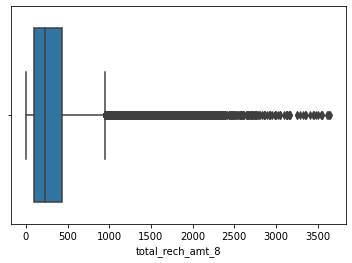

In [70]:
sns.boxplot(df.total_rech_amt_8[df.total_rech_amt_8 <= 3900])
plt.show()

In [71]:
df = df[df.total_rech_amt_8 <= 3900]

max_rech_amt_6

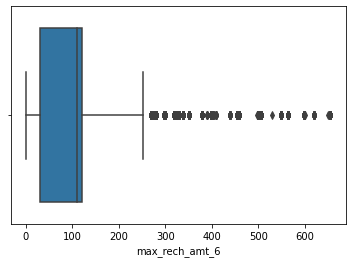

In [72]:
sns.boxplot(df.max_rech_amt_6[df.max_rech_amt_6 <= 700])
plt.show()

In [73]:
df = df[df.max_rech_amt_6 <= 700]

max_rech_amt_7

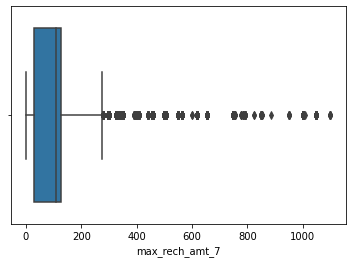

In [74]:
sns.boxplot(df.max_rech_amt_7[df.max_rech_amt_7 <= 1200])
plt.show()

In [75]:
df = df[df.max_rech_amt_7 <= 1200]

max_rech_amt_8

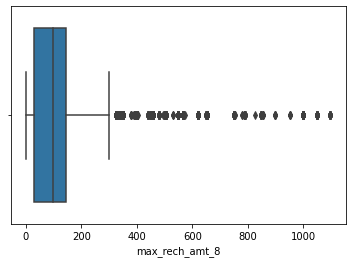

In [76]:
sns.boxplot(df.max_rech_amt_8[df.max_rech_amt_8 <= 1200])
plt.show()

In [77]:
df = df[df.max_rech_amt_8 <= 1200]

day_of_last_rech_6

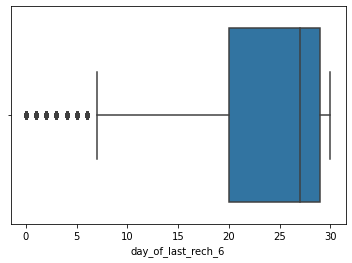

In [78]:
sns.boxplot(df.day_of_last_rech_6)
plt.show()

day_of_last_rech_7

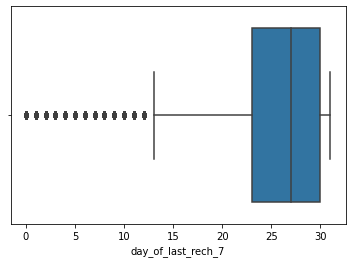

In [79]:
sns.boxplot(df.day_of_last_rech_7)
plt.show()

day_of_last_rech_8

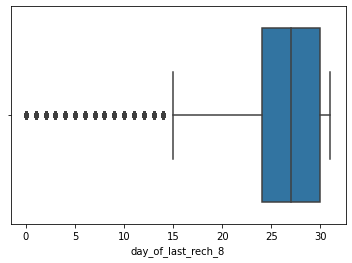

In [80]:
sns.boxplot(df.day_of_last_rech_8)
plt.show()

last_day_rch_amt_6

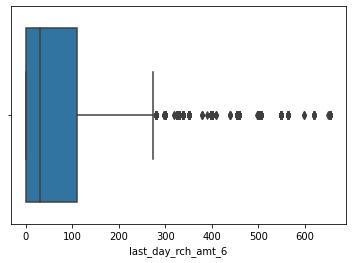

In [81]:
sns.boxplot(df.last_day_rch_amt_6)
plt.show()

last_day_rch_amt_7

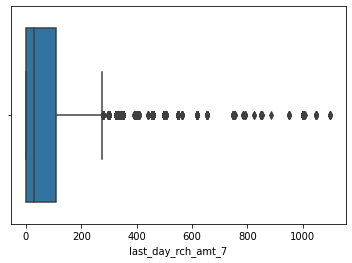

In [82]:
sns.boxplot(df.last_day_rch_amt_7)
plt.show()

last_day_rch_amt_8

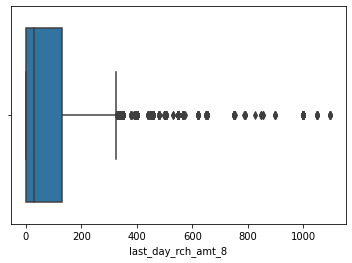

In [83]:
sns.boxplot(df.last_day_rch_amt_8)
plt.show()

max_rech_data_6

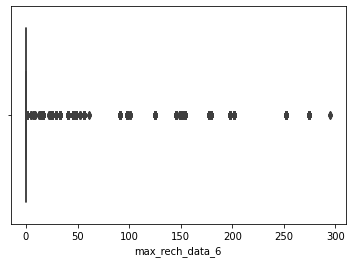

In [84]:
sns.boxplot(df.max_rech_data_6[df.max_rech_data_6 < 400])
plt.show()

In [85]:
df = df[df.max_rech_data_6 < 400]

max_rech_data_7

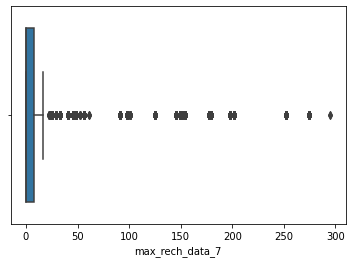

In [86]:
sns.boxplot(df.max_rech_data_7[df.max_rech_data_7 < 400])
plt.show()

In [87]:
df = df[df.max_rech_data_7 < 400]

max_rech_data_8

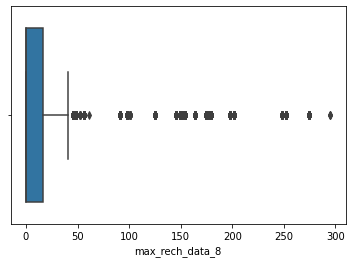

In [88]:
sns.boxplot(df.max_rech_data_8[df.max_rech_data_8 < 400])
plt.show()

In [89]:
df = df[df.max_rech_data_8 < 400]

count_rech_2g_6

- I have observed that most people either buy 2g data or 3g data
- We can club them together to make a single data usage column
- We can do this for all types of columns which are divided into 2g and 3g

In [90]:
# combining 2g and 3g columns into a single column

df["count_rech_2g+3g_6"] = df.count_rech_2g_6 + df.count_rech_3g_6
df["count_rech_2g+3g_7"] = df.count_rech_2g_7 + df.count_rech_3g_7
df["count_rech_2g+3g_8"] = df.count_rech_2g_8 + df.count_rech_3g_8
df["vol_2g+3g_mb_6"] = df.vol_2g_mb_6 + df.vol_3g_mb_6
df["vol_2g+3g_mb_7"] = df.vol_2g_mb_7 + df.vol_3g_mb_7
df["vol_2g+3g_mb_8"] = df.vol_2g_mb_8 + df.vol_3g_mb_8
df["arpu_2g+3g_6"] = df.arpu_2g_6 + df.arpu_3g_6
df["arpu_2g+3g_7"] = df.arpu_2g_7 + df.arpu_3g_7
df["arpu_2g+3g_8"] = df.arpu_2g_8 + df.arpu_3g_8

test_df["count_rech_2g+3g_6"] = test_df.count_rech_2g_6 + test_df.count_rech_3g_6
test_df["count_rech_2g+3g_7"] = test_df.count_rech_2g_7 + test_df.count_rech_3g_7
test_df["count_rech_2g+3g_8"] = test_df.count_rech_2g_8 + test_df.count_rech_3g_8
test_df["vol_2g+3g_mb_6"] = test_df.vol_2g_mb_6 + test_df.vol_3g_mb_6
test_df["vol_2g+3g_mb_7"] = test_df.vol_2g_mb_7 + test_df.vol_3g_mb_7
test_df["vol_2g+3g_mb_8"] = test_df.vol_2g_mb_8 + test_df.vol_3g_mb_8
test_df["arpu_2g+3g_6"] = test_df.arpu_2g_6 + test_df.arpu_3g_6
test_df["arpu_2g+3g_7"] = test_df.arpu_2g_7 + test_df.arpu_3g_7
test_df["arpu_2g+3g_8"] = test_df.arpu_2g_8 + test_df.arpu_3g_8

In [91]:
# dropping the individual 2g and 3g columns

df = df.drop(columns=['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6',
                 'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7',
                 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',])

test_df = test_df.drop(columns=['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6',
                 'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7',
                 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',])

In [92]:
df.columns

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'day_of_last_rech_6',
       'day_of_last_rech_7', 'day_of_last_rech_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'churn_probability', 'count_rech_2g+3g_6',
       'count_rech_2g+3g_7', 'count_rech_2g+3g_8', 'vol_2g+3g_mb_6',
       'vol_2g+3g_mb_7', 'vol_2g+3g_mb_8', 'arpu_2g+3g_6', 'arpu_2g+3g_7',
       'arpu_2g+3g_8'],
      dtype='object')

In [93]:
# let's rearrange the columns

cols = ['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'day_of_last_rech_6',
       'day_of_last_rech_7', 'day_of_last_rech_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g+3g_6',
       'count_rech_2g+3g_7', 'count_rech_2g+3g_8', 'vol_2g+3g_mb_6',
       'vol_2g+3g_mb_7', 'vol_2g+3g_mb_8', 'arpu_2g+3g_6', 'arpu_2g+3g_7',
       'arpu_2g+3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'churn_probability']

cols_test = ['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'day_of_last_rech_6',
       'day_of_last_rech_7', 'day_of_last_rech_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g+3g_6',
       'count_rech_2g+3g_7', 'count_rech_2g+3g_8', 'vol_2g+3g_mb_6',
       'vol_2g+3g_mb_7', 'vol_2g+3g_mb_8', 'arpu_2g+3g_6', 'arpu_2g+3g_7',
       'arpu_2g+3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g']

In [94]:
df = df[cols]
test_df = test_df[cols_test]
df.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g+3g_6,count_rech_2g+3g_7,count_rech_2g+3g_8,vol_2g+3g_mb_6,vol_2g+3g_mb_7,vol_2g+3g_mb_8,arpu_2g+3g_6,arpu_2g+3g_7,arpu_2g+3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,81.21,221.68,3.63,11.84,53.04,40.56,3,2,2,77,65,10,65,65,10,22.0,10.0,24.0,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,1958,0.0,0.0,0.0,0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,30.73,31.66,3.44,39.44,25.04,3,4,5,0,145,50,0,145,50,12.0,10.0,26.0,0,0,0,0.0,145.0,0.0,0.0,1.0,0.0,0.0,356.87,0.00,0.0,244.15,0.0,710,0.0,0.0,0.0,0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,56.49,99.36,0.00,124.29,33.83,36.64,2,4,2,70,120,0,70,70,0,11.0,22.0,24.0,70,50,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,882,0.0,0.0,0.0,0
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,76.03,95.98,53.84,95.11,50.18,83.84,2,4,3,160,240,130,110,110,50,15.0,21.0,25.0,110,110,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,982,0.0,0.0,0.0,0
4,4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,63.26,42.94,15.76,21.54,9.36,28.31,13,10,8,290,136,122,50,41,30,25.0,26.0,30.0,25,10,30,25.0,41.0,25.0,7.0,7.0,6.0,390.8,308.89,213.47,0.0,70.12,0.0,647,0.0,0.0,0.0,0


count_rech_2g+3g_6

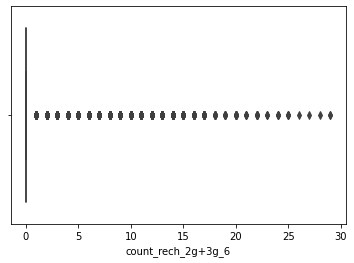

In [95]:
sns.boxplot(df["count_rech_2g+3g_6"][df["count_rech_2g+3g_6"] < 30])
plt.show()

In [96]:
df = df[df["count_rech_2g+3g_6"] < 30]

count_rech_2g+3g_7

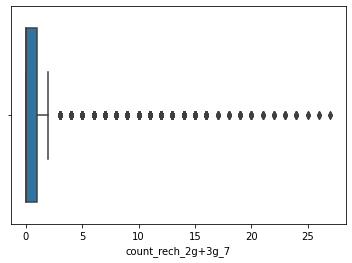

In [97]:
sns.boxplot(df["count_rech_2g+3g_7"][df["count_rech_2g+3g_7"] < 29])
plt.show()

In [98]:
df = df[df["count_rech_2g+3g_7"] < 29]

count_rech_2g+3g_8

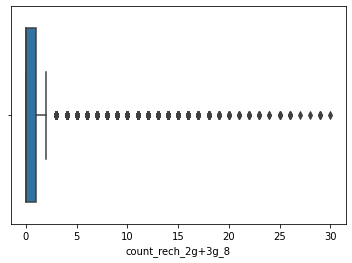

In [99]:
sns.boxplot(df["count_rech_2g+3g_8"][df["count_rech_2g+3g_8"] < 32])
plt.show()

In [100]:
df = df[df["count_rech_2g+3g_8"] < 32]

vol_2g+3g_mb_6

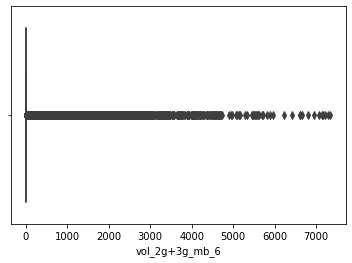

In [101]:
sns.boxplot(df["vol_2g+3g_mb_6"][df["vol_2g+3g_mb_6"] < 7400])
plt.show()

In [102]:
df = df[df["vol_2g+3g_mb_6"] < 7400]

vol_2g+3g_mb_7

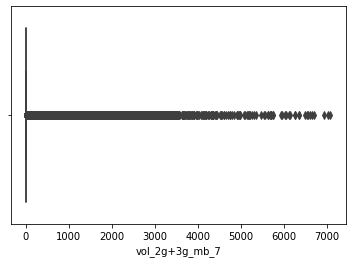

In [103]:
sns.boxplot(df["vol_2g+3g_mb_7"][df["vol_2g+3g_mb_7"] < 7600])
plt.show()

In [104]:
df = df[df["vol_2g+3g_mb_7"] < 7600]

vol_2g+3g_mb_8

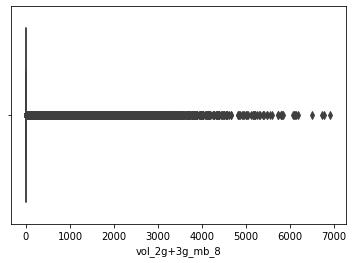

In [105]:
sns.boxplot(df["vol_2g+3g_mb_8"][df["vol_2g+3g_mb_8"] < 7200])
plt.show()

In [106]:
df = df[df["vol_2g+3g_mb_8"] < 7200]

arpu_2g+3g_6

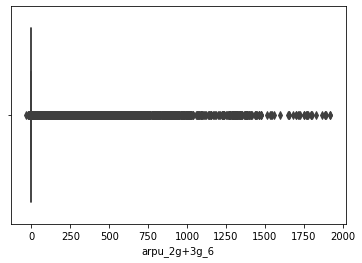

In [107]:
sns.boxplot(df["arpu_2g+3g_6"][df["arpu_2g+3g_6"] < 2000])
plt.show()

In [108]:
df.shape, df[df["arpu_2g+3g_6"] < 2000].shape

((67670, 48), (67647, 48))

In [109]:
df = df[df["arpu_2g+3g_6"] < 2000]

arpu_2g+3g_7

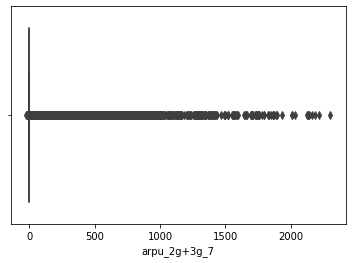

In [110]:
sns.boxplot(df["arpu_2g+3g_7"][df["arpu_2g+3g_7"] < 2500])
plt.show()

In [111]:
df = df[df["arpu_2g+3g_7"] < 2500]

arpu_2g+3g_8

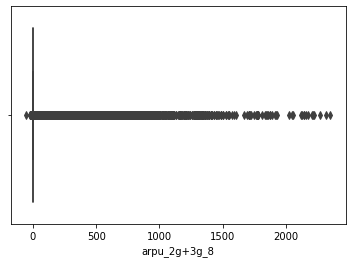

In [112]:
sns.boxplot(df["arpu_2g+3g_8"][df["arpu_2g+3g_8"] < 2400])
plt.show()

In [113]:
df = df[df["arpu_2g+3g_8"] < 2400]

aon

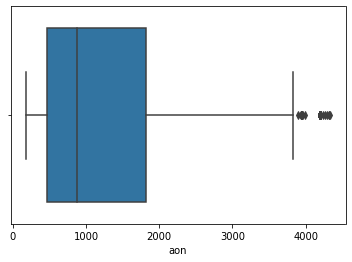

In [114]:
sns.boxplot(df.aon)
plt.show()

In [115]:
df.aon.max()

4337

- there are some outliers in aon (age of customer on the network)
- but even the max value is possible so we won't remove the outliers of aon

aug_vbc_3g

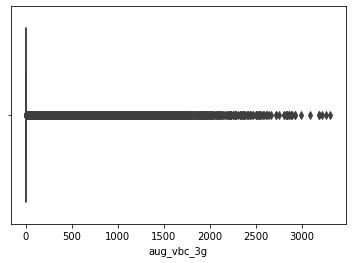

In [116]:
sns.boxplot(df.aug_vbc_3g[df.aug_vbc_3g < 3500])
plt.show()

In [117]:
df = df[df.aug_vbc_3g < 3500]

jul_vbc_3g

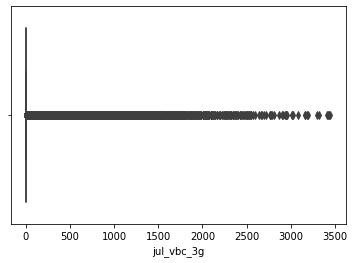

In [118]:
sns.boxplot(df.jul_vbc_3g[df.jul_vbc_3g < 3500])
plt.show()

In [119]:
df = df[df.jul_vbc_3g < 3500]

jun_vbc_3g

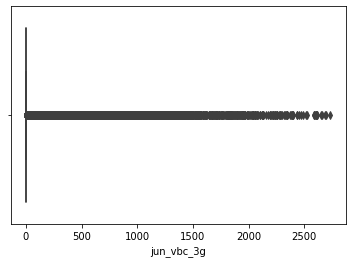

In [120]:
sns.boxplot(df.jun_vbc_3g[df.jun_vbc_3g < 2800])
plt.show()

In [121]:
df = df[df.jun_vbc_3g < 2800]

Treatment of outliers values are done! Let's proceed.

#### Bivariate Analysis

- All the features in our dataset are numeric
- Let's make a function to plot graphs for numeric v/s numeric columns

In [122]:
def scatter(x, y, hue=None):
    sns.scatterplot(x, y, data=df, hue=hue)
    plt.show()

def boxplot(y, x="churn_probability"):
    sns.boxplot(x, y, data=df)
    plt.show()

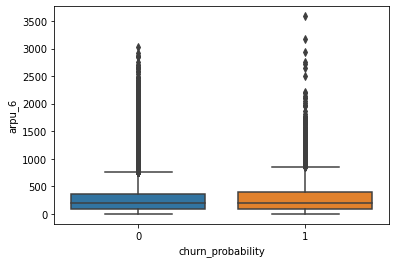

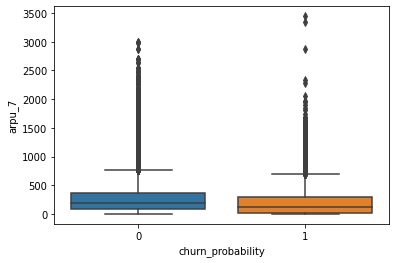

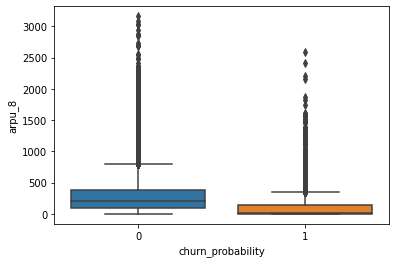

In [123]:
boxplot("arpu_6")
boxplot("arpu_7")
boxplot("arpu_8")

- the average revenue per user is more or less the same for 6th and 7th month
- arpu of churn is less than non churn in the 8th month
- this suggests that people reduced their usage in the 8th month

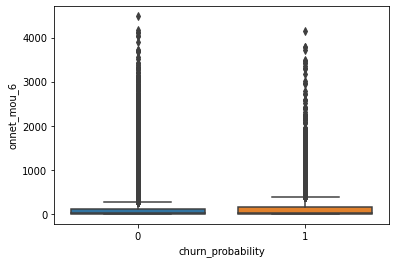

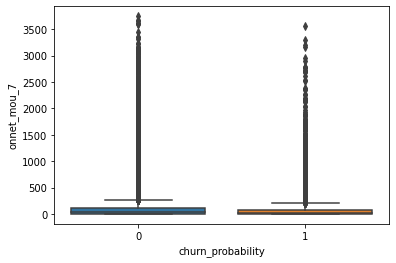

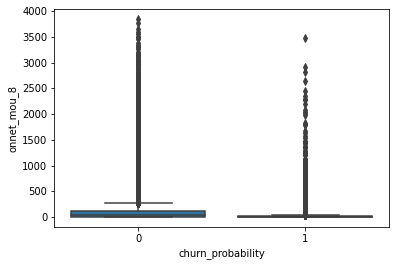

In [124]:
boxplot("onnet_mou_6")
boxplot("onnet_mou_7")
boxplot("onnet_mou_8")

- onnet_mou stands for minutes of usage for all kinds of calls within the same network 
- a clear reduction of minutes of usage can be seen from 6th to 8th month
- this remains the same for non churn customers

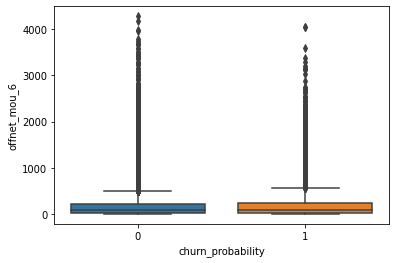

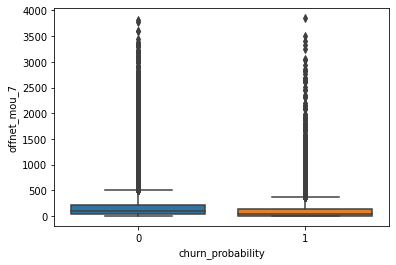

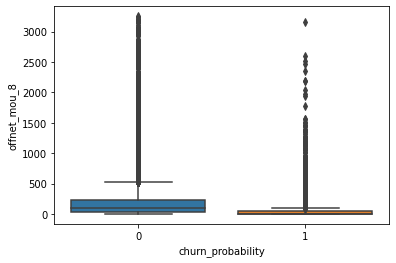

In [125]:
boxplot("offnet_mou_6")
boxplot("offnet_mou_7")
boxplot("offnet_mou_8")

- similar trend can be seen with offnet_mou for all the three months
- the minutes of usage decreases in the 8th month drastically
- remains the same for non churn customers

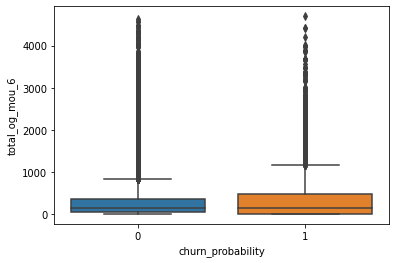

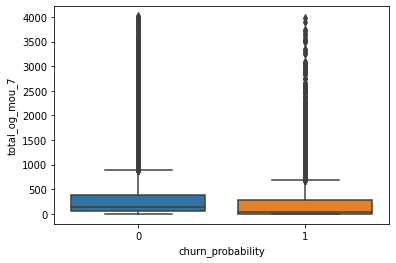

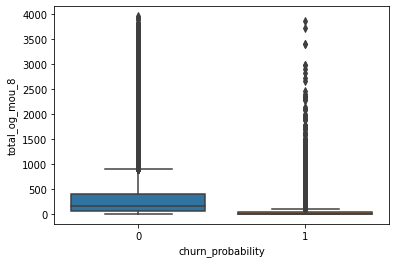

In [126]:
boxplot("total_og_mou_6")
boxplot("total_og_mou_7")
boxplot("total_og_mou_8")

- total_og_mou stands for total outgoing minutes of usage 
- reduces drastically in the 8th month, with the median going down in the 7th month

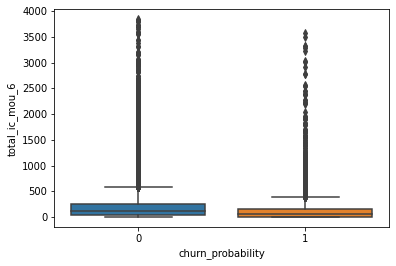

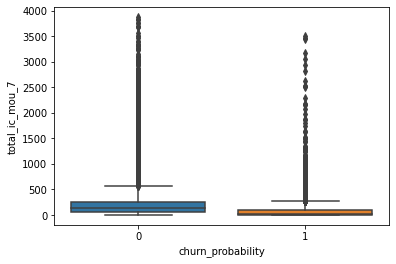

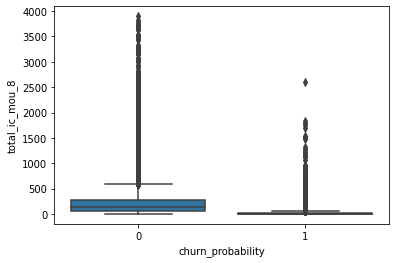

In [127]:
boxplot("total_ic_mou_6")
boxplot("total_ic_mou_7")
boxplot("total_ic_mou_8")

- total_ic_mou is same for non churn customers for all three months
- reduces by each month for churn customers, becoming almost negligible for 8th month

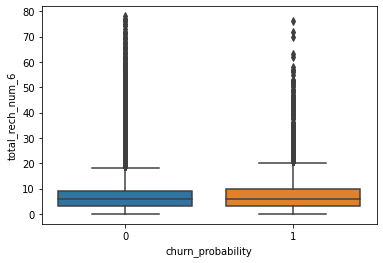

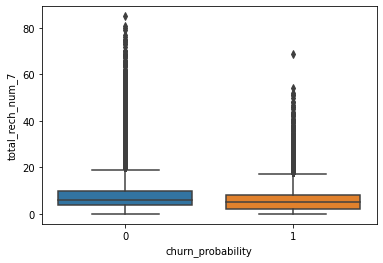

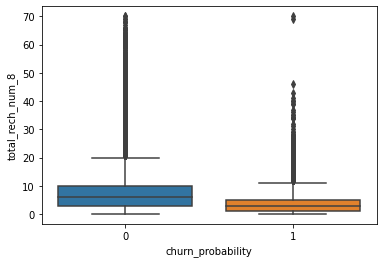

In [128]:
boxplot("total_rech_num_6")
boxplot("total_rech_num_7")
boxplot("total_rech_num_8")

- similar trend is seen with total recharge number
- reduces at a constant pace for the three months

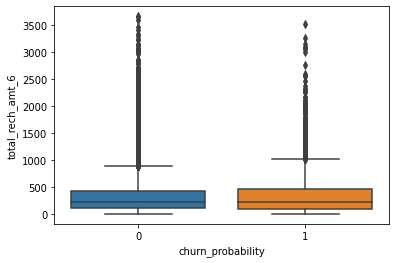

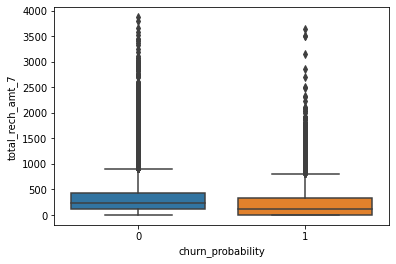

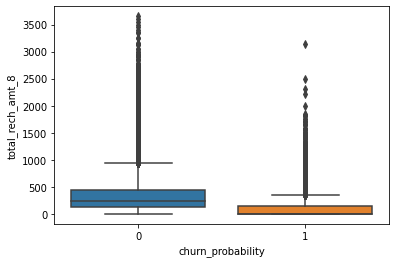

In [129]:
boxplot("total_rech_amt_6")
boxplot("total_rech_amt_7")
boxplot("total_rech_amt_8")

- total recharge amount is also reduced by each month, like other features

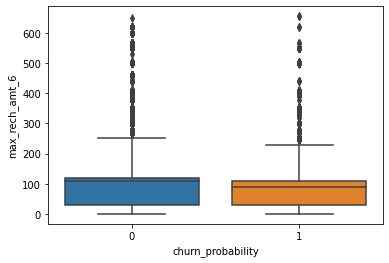

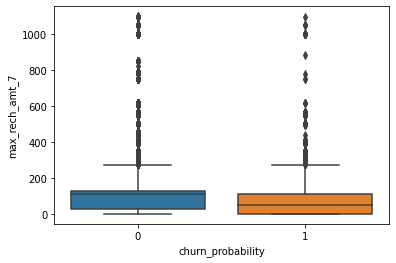

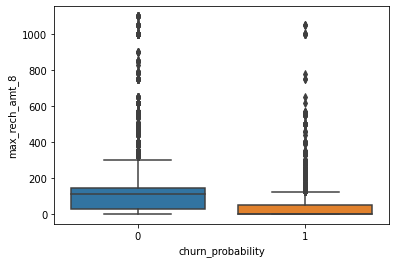

In [130]:
boxplot("max_rech_amt_6")
boxplot("max_rech_amt_7")
boxplot("max_rech_amt_8")

- max recharge amount is also reduces by each month for churn customers

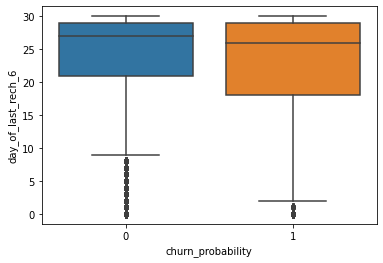

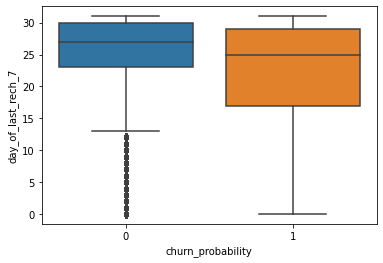

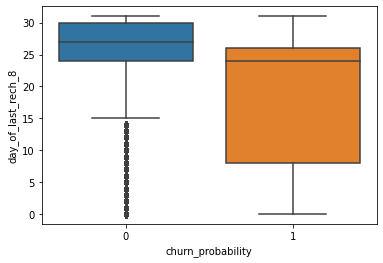

In [131]:
boxplot("day_of_last_rech_6")
boxplot("day_of_last_rech_7")
boxplot("day_of_last_rech_8")

- day of last recharge is same for all three months for non churn customers
- for churn customers, it's more of less same for 6th and 7th month
- the spread of box plot is stretched downwards for 8th month in case of churn 
- this suggests that people recharged earlier when they were about to churn

In [132]:
df.columns

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'day_of_last_rech_6',
       'day_of_last_rech_7', 'day_of_last_rech_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g+3g_6',
       'count_rech_2g+3g_7', 'count_rech_2g+3g_8', 'vol_2g+3g_mb_6',
       'vol_2g+3g_mb_7', 'vol_2g+3g_mb_8', 'arpu_2g+3g_6', 'arpu_2g+3g_7',
       'arpu_2g+3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'churn_probability'],
      dtype='object')

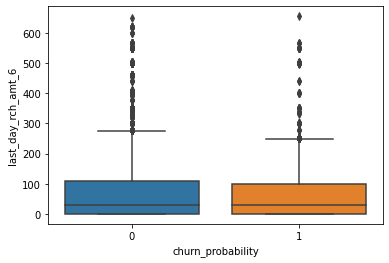

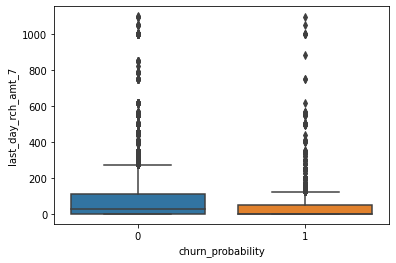

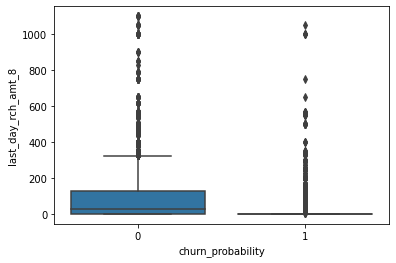

In [133]:
boxplot("last_day_rch_amt_6")
boxplot("last_day_rch_amt_7")
boxplot("last_day_rch_amt_8")

- last day recharge amount is showing a decreasing trend in churn case
- this shows, people recharge less before the month they are about to churn

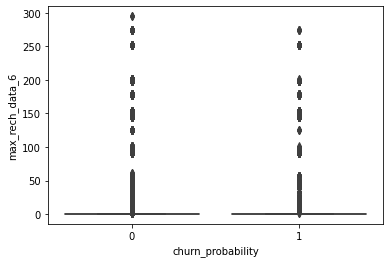

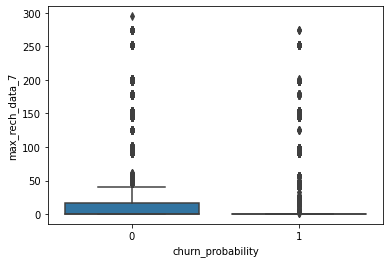

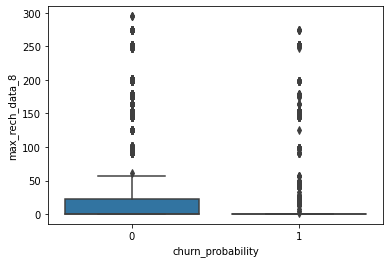

In [134]:
boxplot("max_rech_data_6")
boxplot("max_rech_data_7")
boxplot("max_rech_data_8")

- majority values are zero in max recharge data
- even then, the outlier values in churn case decrease in 8th month

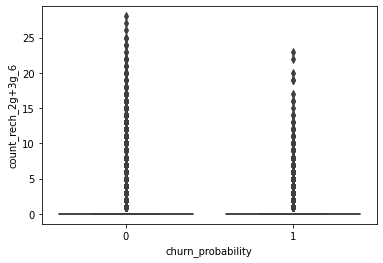

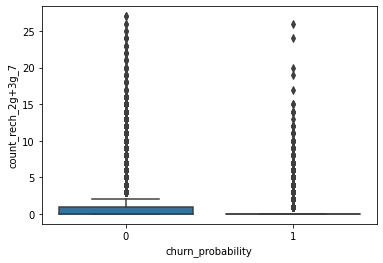

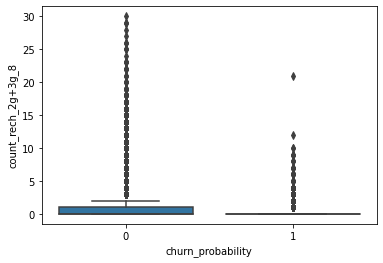

In [135]:
boxplot("count_rech_2g+3g_6")
boxplot("count_rech_2g+3g_7")
boxplot("count_rech_2g+3g_8")

- this shows similar trend to max_rech_data

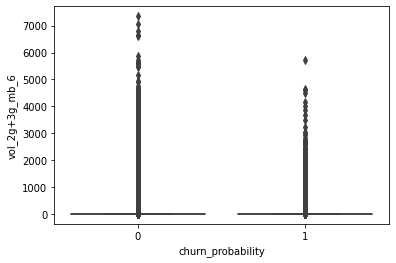

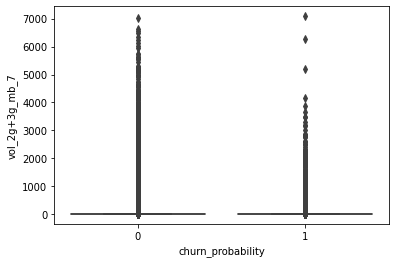

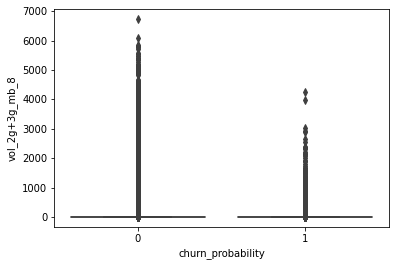

In [136]:
boxplot("vol_2g+3g_mb_6")
boxplot("vol_2g+3g_mb_7")
boxplot("vol_2g+3g_mb_8")

- similar trend here also

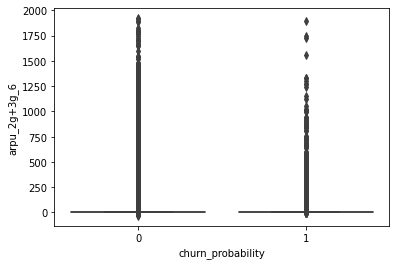

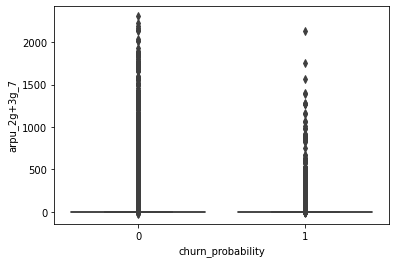

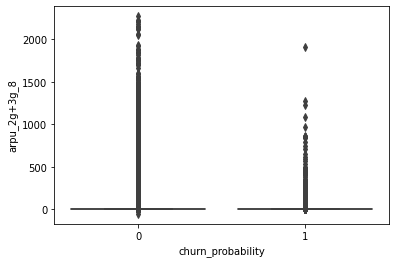

In [137]:
boxplot("arpu_2g+3g_6")
boxplot("arpu_2g+3g_7")
boxplot("arpu_2g+3g_8")

- last few columns are very similar in term of the data they represent

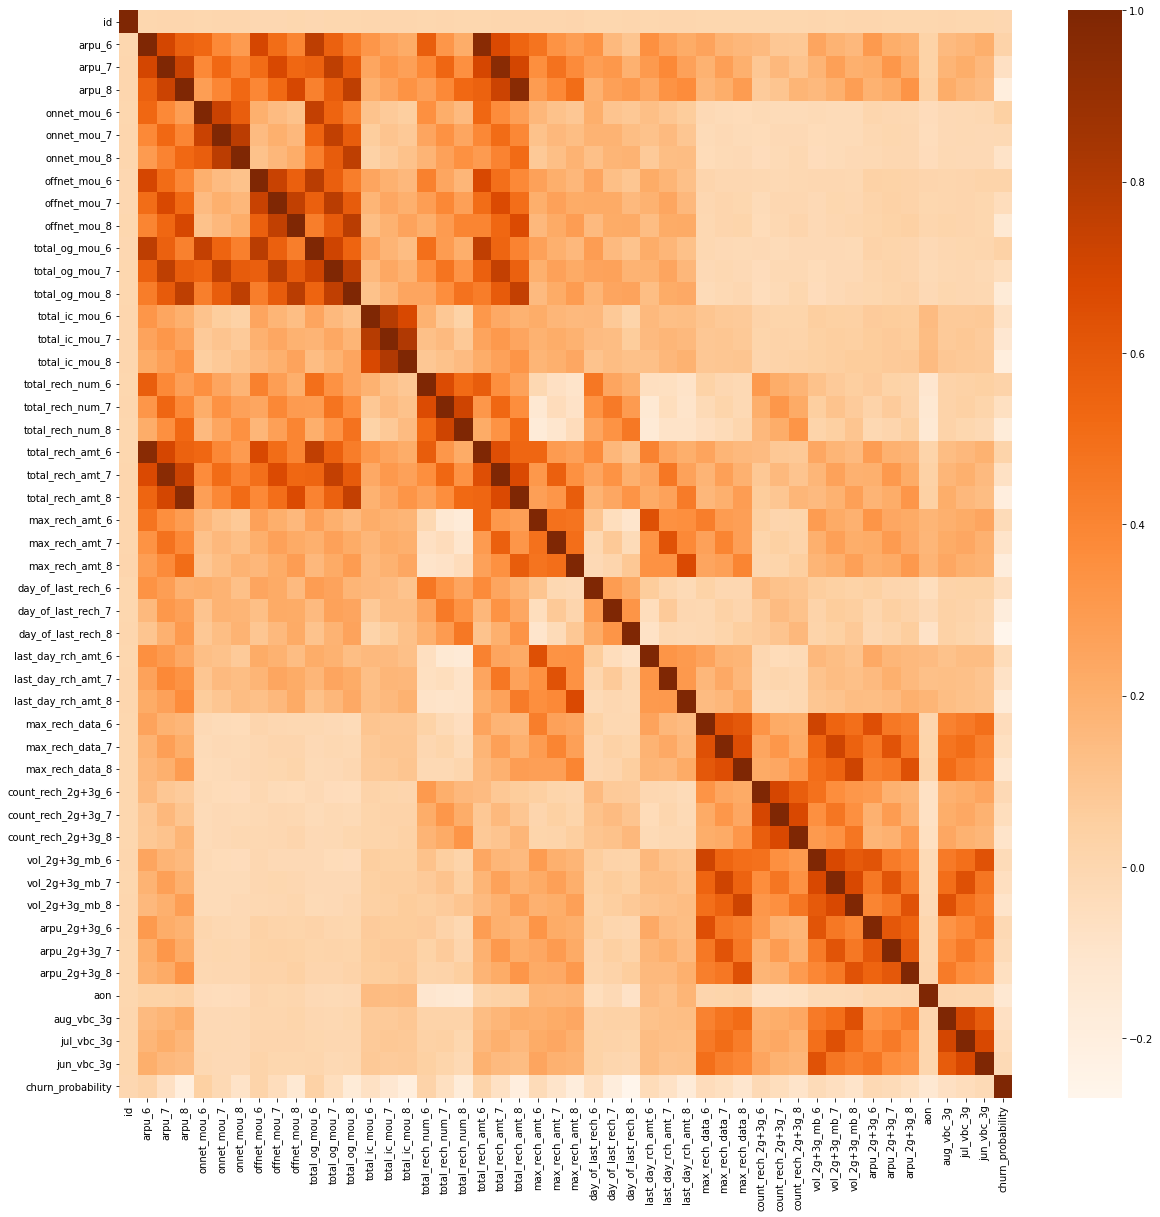

In [138]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cmap="Oranges")
plt.show()

- the correlations between the variables are not very high

### Data Preparation

In [139]:
x_train = df.drop(columns=["id", "churn_probability"])
y_train = df.churn_probability

x_test = test_df.drop(columns=["id"])

### Building an Interpretable Model
#### Steps:-
1. Build a random forest model on the data
2. Use important_features_ functionality to obtain the most relevant features
3. Build a Logistic Regression model on important features
4. Also build a Decision Tree on the important variables for better interpretation

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#### Random Forest to identify important features

In [141]:
# using class_weight="balanced" to handle class imbalance

rf = RandomForestClassifier(n_estimators=200, oob_score=True, n_jobs=-1, random_state=100, class_weight="balanced")

In [142]:
params = {
    "max_depth":[10, 20, 40, 80, 160],
    "min_samples_leaf":[50, 100, 200, 400, 800]
}

In [143]:
gs = GridSearchCV(estimator=rf, param_grid=params, scoring="accuracy", n_jobs=-1, cv=4)

gs.fit(x_train, y_train)

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_estimators=200, n_jobs=-1,
                                              oob_score=True,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 40, 80, 160],
                         'min_samples_leaf': [50, 100, 200, 400, 800]},
             scoring='accuracy')

In [144]:
rf_best = gs.best_estimator_

In [145]:
rf_best.feature_importances_

array([0.0068697 , 0.01213891, 0.08183042, 0.00493874, 0.00682347,
       0.02518505, 0.00527835, 0.01116001, 0.05472957, 0.0124246 ,
       0.02277437, 0.12652843, 0.01654117, 0.03022334, 0.22041116,
       0.005761  , 0.00950408, 0.01220507, 0.00431443, 0.00833179,
       0.07920859, 0.00278636, 0.00630769, 0.06405134, 0.00201831,
       0.00217462, 0.04122049, 0.00116955, 0.00178973, 0.06898164,
       0.00090387, 0.00118534, 0.00719409, 0.00046907, 0.00072223,
       0.00750174, 0.00132278, 0.00153255, 0.00909521, 0.00067767,
       0.00100023, 0.00260442, 0.01553727, 0.00163334, 0.00044605,
       0.00049214])

In [146]:
# creating a dataframe of feature importances

ft_imp = pd.DataFrame({"Feature":x_train.columns, "Importance":rf_best.feature_importances_})
ft_imp = ft_imp.sort_values(by="Importance", ascending=False)

In [147]:
ft_imp.head(10)

,Feature,Importance
14,total_ic_mou_8,0.220411
11,total_og_mou_8,0.126528
2,arpu_8,0.081830
20,total_rech_amt_8,0.079209
29,last_day_rch_amt_8,0.068982
23,max_rech_amt_8,0.064051
8,offnet_mou_8,0.054730
26,day_of_last_rech_8,0.041220
13,total_ic_mou_7,0.030223
5,onnet_mou_8,0.025185


Let's make a function which gives us a specified number of most important features

In [148]:
def important_features(n):
    lst = ft_imp.head(n).Feature.values
    return lst

In [149]:
# 10 most important features

important_features(10)

array(['total_ic_mou_8', 'total_og_mou_8', 'arpu_8', 'total_rech_amt_8',
       'last_day_rch_amt_8', 'max_rech_amt_8', 'offnet_mou_8',
       'day_of_last_rech_8', 'total_ic_mou_7', 'onnet_mou_8'],
      dtype=object)

#### Now, we'll build a logistic regression model on this

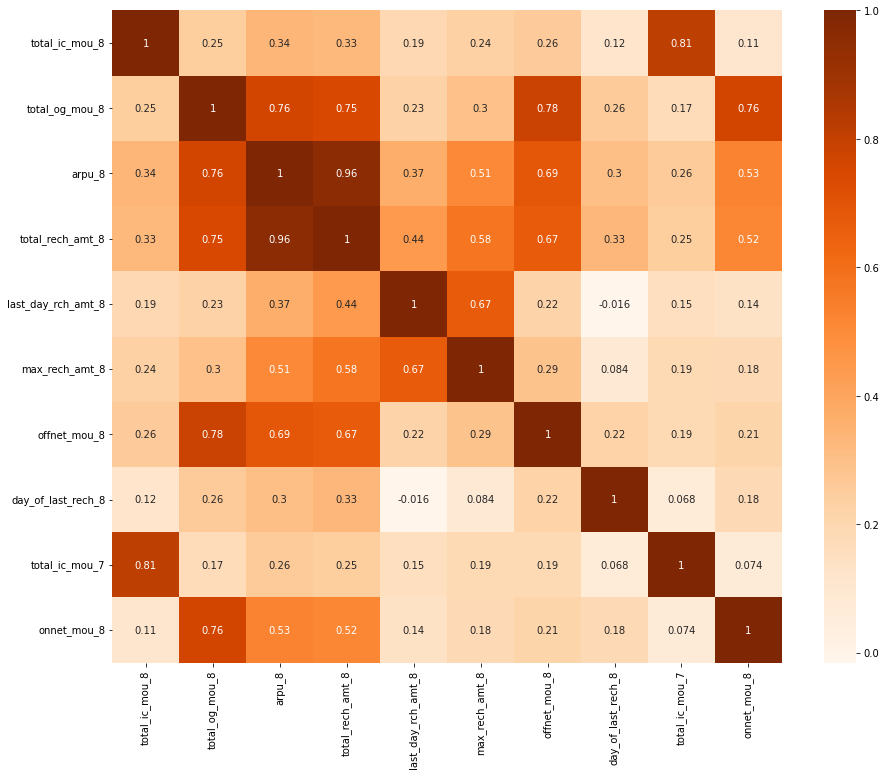

In [150]:
imp_10 = important_features(10)

plt.figure(figsize=(15, 12))
sns.heatmap(x_train[imp_10].corr(), cmap="Oranges", annot=True)
plt.show()

- As it's clear from the heatmap, there's multicollinearity between the important features
- Presence of multicollinearity in the data cannot be allowed for logistic regression
- Let's remove the high multicollinearity variables using VIF score

#### Feature elimination based on VIF score

In [151]:
# making a function to calculate vif score

from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["VIF"] = round(vif["VIF"], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif

In [152]:
get_vif(x_train[imp_10])

,Features,VIF
1,total_og_mou_8,91.87
6,offnet_mou_8,41.83
9,onnet_mou_8,32.34
3,total_rech_amt_8,28.40
2,arpu_8,26.70
0,total_ic_mou_8,4.79
5,max_rech_amt_8,4.64
8,total_ic_mou_7,4.44
4,last_day_rch_amt_8,2.82
7,day_of_last_rech_8,2.63


- Let's remove onnet_mou_8 because it's the least important in top 10

In [153]:
imp_10

array(['total_ic_mou_8', 'total_og_mou_8', 'arpu_8', 'total_rech_amt_8',
       'last_day_rch_amt_8', 'max_rech_amt_8', 'offnet_mou_8',
       'day_of_last_rech_8', 'total_ic_mou_7', 'onnet_mou_8'],
      dtype=object)

In [154]:
imp_9 = ['total_ic_mou_8', 'total_og_mou_8', 'total_rech_amt_8', 'arpu_8',
       'last_day_rch_amt_8', 'max_rech_amt_8', 'offnet_mou_8',
       'day_of_last_rech_8', 'total_ic_mou_7']

In [155]:
get_vif(x_train[imp_9])

,Features,VIF
2,total_rech_amt_8,28.25
3,arpu_8,26.52
1,total_og_mou_8,5.24
0,total_ic_mou_8,4.73
5,max_rech_amt_8,4.64
8,total_ic_mou_7,4.43
6,offnet_mou_8,3.84
4,last_day_rch_amt_8,2.82
7,day_of_last_rech_8,2.63


Let's remove arpu_8 because it's less important than total_rech_amt_8 according to feature importances of random forest

In [156]:
imp_9

['total_ic_mou_8',
 'total_og_mou_8',
 'total_rech_amt_8',
 'arpu_8',
 'last_day_rch_amt_8',
 'max_rech_amt_8',
 'offnet_mou_8',
 'day_of_last_rech_8',
 'total_ic_mou_7']

In [157]:
imp_8 = ['total_ic_mou_8',
 'total_og_mou_8',
 'total_rech_amt_8',
 'last_day_rch_amt_8',
 'max_rech_amt_8',
 'offnet_mou_8',
 'day_of_last_rech_8',
 'total_ic_mou_7']

In [158]:
get_vif(x_train[imp_8])

,Features,VIF
2,total_rech_amt_8,7.03
1,total_og_mou_8,5.15
0,total_ic_mou_8,4.72
4,max_rech_amt_8,4.63
7,total_ic_mou_7,4.43
5,offnet_mou_8,3.81
3,last_day_rch_amt_8,2.79
6,day_of_last_rech_8,2.58


Removing total_rech_amt_8

In [159]:
imp_8

['total_ic_mou_8',
 'total_og_mou_8',
 'total_rech_amt_8',
 'last_day_rch_amt_8',
 'max_rech_amt_8',
 'offnet_mou_8',
 'day_of_last_rech_8',
 'total_ic_mou_7']

In [160]:
imp_7 = ['total_ic_mou_8',
 'total_og_mou_8',
 'last_day_rch_amt_8',
 'max_rech_amt_8',
 'offnet_mou_8',
 'day_of_last_rech_8',
 'total_ic_mou_7']

In [161]:
get_vif(x_train[imp_7])

,Features,VIF
0,total_ic_mou_8,4.69
6,total_ic_mou_7,4.43
3,max_rech_amt_8,3.95
1,total_og_mou_8,3.93
4,offnet_mou_8,3.69
2,last_day_rch_amt_8,2.76
5,day_of_last_rech_8,2.48


Removing total_ic_mou_7

In [162]:
imp_7

['total_ic_mou_8',
 'total_og_mou_8',
 'last_day_rch_amt_8',
 'max_rech_amt_8',
 'offnet_mou_8',
 'day_of_last_rech_8',
 'total_ic_mou_7']

In [163]:
imp_6 = ['total_ic_mou_8',
 'total_og_mou_8',
 'last_day_rch_amt_8',
 'max_rech_amt_8',
 'offnet_mou_8',
 'day_of_last_rech_8']

In [164]:
get_vif(x_train[imp_6])

,Features,VIF
3,max_rech_amt_8,3.95
1,total_og_mou_8,3.93
4,offnet_mou_8,3.69
2,last_day_rch_amt_8,2.76
5,day_of_last_rech_8,2.44
0,total_ic_mou_8,1.70


We'll use these 6 features to build our logistic regression model to see which one contributes more towards churn

#### Logistic Regression to see the impact of each variable

In [165]:
x_train_logreg = x_train[imp_6]
x_test_logreg = x_test[imp_6]
x_train_logreg.head()

,total_ic_mou_8,total_og_mou_8,last_day_rch_amt_8,max_rech_amt_8,offnet_mou_8,day_of_last_rech_8
0,40.56,3.63,0,10,2.33,24.0
1,25.04,31.66,0,50,30.89,26.0
2,36.64,0.00,0,0,0.00,24.0
3,83.84,53.84,50,50,50.23,25.0
4,28.31,15.76,30,30,9.63,30.0


#### We need to scale down the values before feeding in logistic regression

In [166]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train_logreg = scaler.fit_transform(x_train_logreg)

x_train_logreg = pd.DataFrame(x_train_logreg, columns=imp_6)

x_train_logreg.head()

,total_ic_mou_8,total_og_mou_8,last_day_rch_amt_8,max_rech_amt_8,offnet_mou_8,day_of_last_rech_8
0,0.010412,0.000919,0.000000,0.009107,0.000716,0.774194
1,0.006428,0.008017,0.000000,0.045537,0.009497,0.838710
2,0.009406,0.000000,0.000000,0.000000,0.000000,0.774194
3,0.021523,0.013634,0.045537,0.045537,0.015443,0.806452
4,0.007268,0.003991,0.027322,0.027322,0.002961,0.967742


In [167]:
# transform the test set

x_test_logreg = scaler.transform(x_test_logreg)
x_test_logreg = pd.DataFrame(x_test_logreg, columns=imp_6)

In [168]:
from sklearn.linear_model import LogisticRegression

In [169]:
lr = LogisticRegression(class_weight="balanced", random_state=100)

lr.fit(x_train_logreg, y_train)

LogisticRegression(class_weight='balanced', random_state=100)

### Evaluation

In [170]:
# importing necessary libraries

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, precision_score, recall_score, f1_score

In [171]:
# predicting on train set

y_train_pred_logreg = lr.predict(x_train_logreg)

In [172]:
# calculating accuracy

accuracy_score(y_train, y_train_pred_logreg)

0.7542307692307693

Logistic Regression model is giving us 75% accuracy

In [173]:
# getting the confusion matrix

confusion_matrix(y_train, y_train_pred_logreg)

array([[45458, 15522],
       [ 1092,  5528]])

- We want to predict churn as accurately as possible
- For that, we need high sensitivity model
- Sensitivity = TP / (TP + FN)

In [174]:
# calculating sensitivity

cm = confusion_matrix(y_train, y_train_pred_logreg)
sensitivity = cm[1][1] / (cm[1][1] + cm[1][0])
sensitivity

0.8350453172205438

Our logistic Regression model is giving 83% sensitivity, which is good. Now, let's plot the ROC curve

In [175]:
# predicted probabilities

lr.predict_proba(x_train_logreg)[:, 1]

array([0.64845081, 0.62824326, 0.65691136, ..., 0.05196814, 0.6147983 ,
       0.59470001])

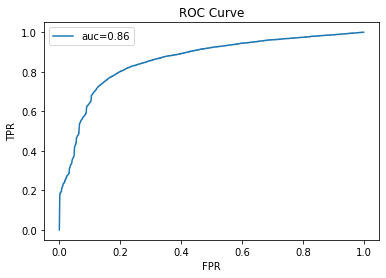

In [176]:
# plotting roc curve

fpr, tpr, thresholds = roc_curve(y_train, lr.predict_proba(x_train_logreg)[:, 1])
auc_score = roc_auc_score(y_train, lr.predict_proba(x_train_logreg)[:, 1])
plt.plot(fpr, tpr, label="auc=%0.2f"%auc_score)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

#### Logistic Regression Performance:-
1. accuracy = 75%
2. sensitivity = 84%
3. roc auc = 86%

#### Now, let's see the most important features according to logistic regression

In [177]:
# coefficients of the 6 important variables

lr.coef_

array([[-24.87539041,  -2.35081985,  -7.05174588,  -1.20576064,
          1.18811198,  -2.11541275]])

Let's see the coefficient for each feature

In [178]:
# represented in the form of dataframe

pd.DataFrame({"Feature":imp_6, "Coefficient":lr.coef_[0]}).sort_values(by="Coefficient")

,Feature,Coefficient
0,total_ic_mou_8,-24.875390
2,last_day_rch_amt_8,-7.051746
1,total_og_mou_8,-2.350820
5,day_of_last_rech_8,-2.115413
3,max_rech_amt_8,-1.205761
4,offnet_mou_8,1.188112


##### Most important features according to logistic regression model:-
1. total_ic_mou_8 - total incoming calls minutes of usage for 8th month
2. last_day_rch_amt_8 - recharge available at the last day of 8th month
3. total_og_mou_8 - total outgoing calls minutes of usage for 8th month
4. day_of_last_rech_8 - day at which last recharge was made for 8th month
5. max_rech_amt_8 - maximum recharge done in the 8th month

#### Observations:-
1. All of the most important features are of the 8th month so the last month's data is important
2. Top 5 most important features are inversely correlated to churn eg. more the incoming calls usage, less the chances of churn

#### Recommendations
1. Customers whose incoming calls minutes of usage are going down has high chances of churn so you should target them more
2. Lesser the amount of recharge available at the month end, more the chances of churn. You can offer cheaper recharges, more data, increase the validity of recharge
3. If the outgoing calls are going down, customer is likely to churn. Attractive offers should be marketed to increase the chances of non churn
4. If recharge is happening earlier in the month, the chances of churning in the next month is high so beware of that also
5. Maximum recharge is less means high chances of churn so you should provide more recharge value in the same price or some similar offers

#### Let's build a Decision Tree to interpret the decision making

- We will use more than 6 variables to build the decision tree because presence of multicollinearity can be allowed for a tree model
- Let's build the decision tree using all the available features

In [179]:
from sklearn.tree import DecisionTreeClassifier

In [180]:
dt = DecisionTreeClassifier(random_state=100, class_weight="balanced")

In [181]:
# we'll make a shallow decision tree for interpretation

params = {
    "max_depth":[5, 7, 9, 11],
    "min_samples_leaf":[1000, 2000, 3000, 4000]
}

In [182]:
gs = GridSearchCV(estimator=dt,
                  param_grid=params,
                  scoring="accuracy",
                  n_jobs=-1,
                  cv=4)

gs.fit(x_train, y_train)

GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9, 11],
                         'min_samples_leaf': [1000, 2000, 3000, 4000]},
             scoring='accuracy')

In [183]:
dt_best = gs.best_estimator_

Let's make a function to visualize the decision tree

In [184]:
# installing necessary library

!pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 KB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=295adec294fbd4948ca26a516547bc38e11ee5aefc7a315e4bc8dbb6f2f7d829
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


In [185]:
# importing necessary libraries

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

In [186]:
def plot(dt_classifier):
    dot_data = StringIO()

    export_graphviz(dt_classifier, out_file=dot_data, filled=True, rounded=True, feature_names=x_train.columns,
                   class_names=["No disease", "Disease"])

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    return Image(graph.create_png())

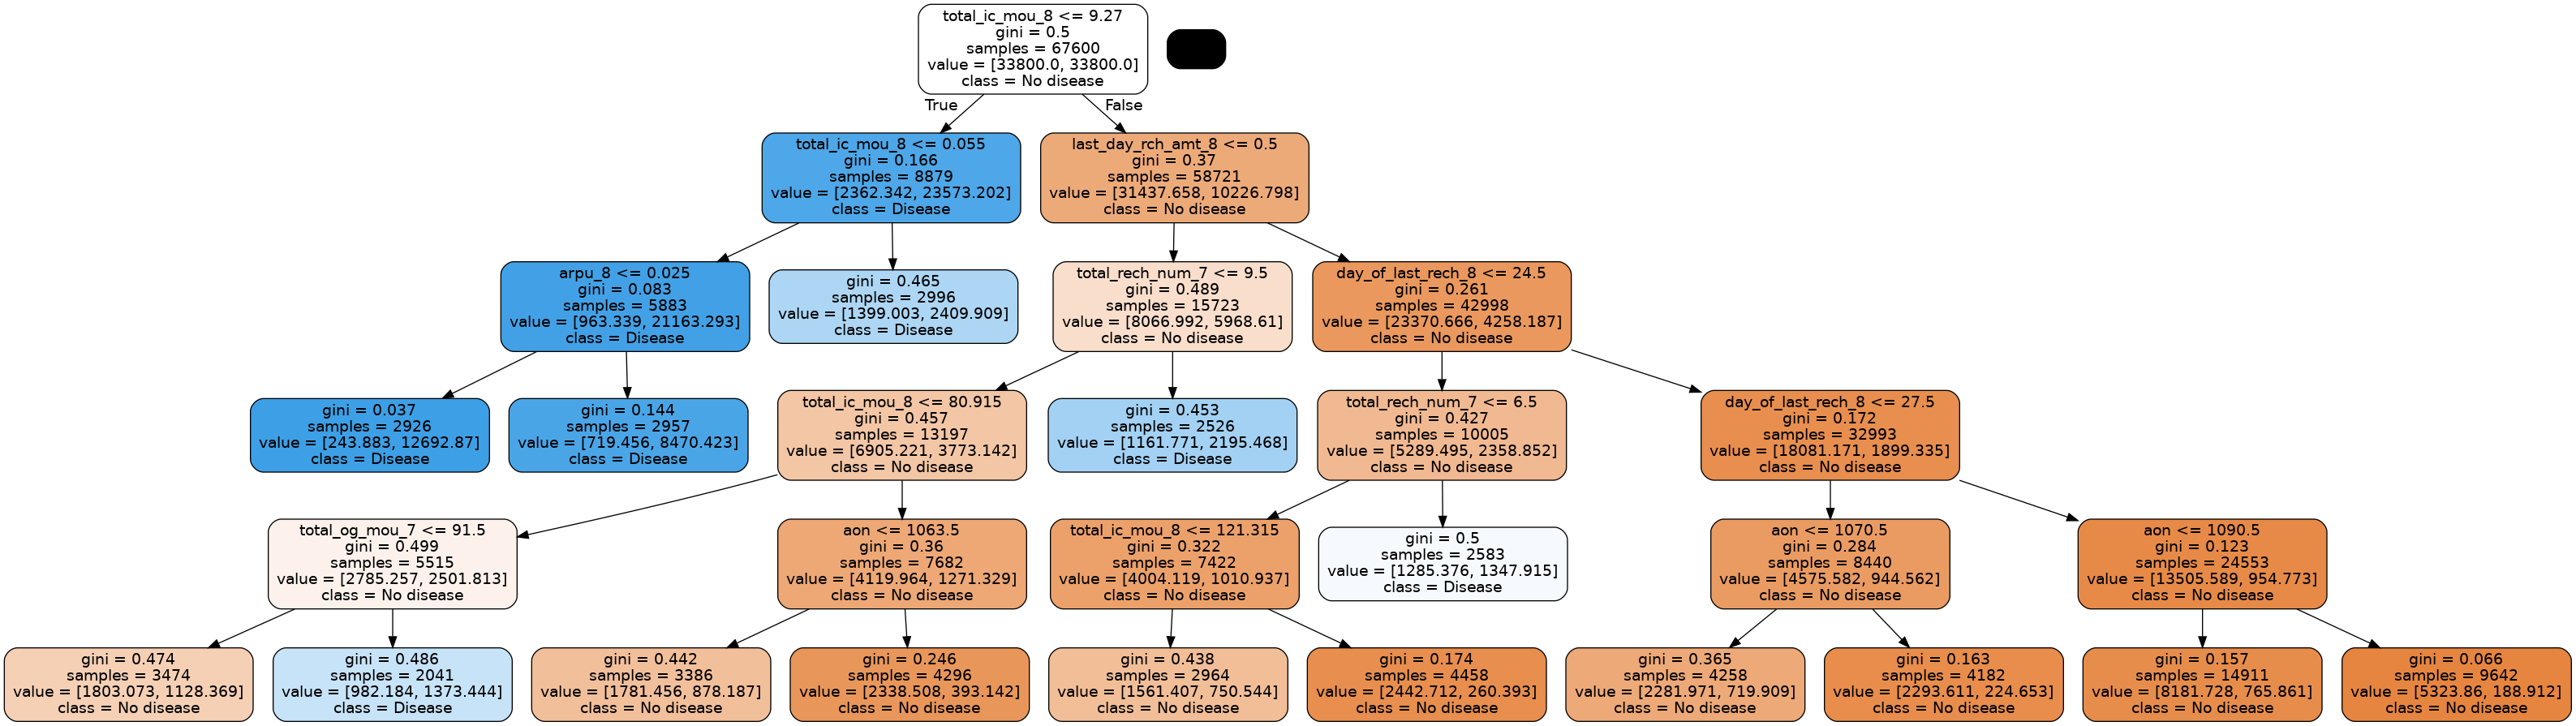

In [187]:
plot(dt_best)

The tree splits on following attributes:-
1. total_ic_mou_8
2. last_day_recharge_amt_8
3. day_of_last_rech_8
4. arpu_8
5. total_rech_num_7
6. total_og_mou_7
7. aon

##### Above variables were the most important in deciding churn of a customer

#### Decision Tree Evaluation

In [188]:
# obtaining predictions from decision tree model

y_train_pred_dt = dt_best.predict(x_train)

# accuracy

accuracy_score(y_train, y_train_pred_dt)

0.8300443786982249

In [189]:
# confusion matrix

confusion_matrix(y_train, y_train_pred_dt)

array([[50531, 10449],
       [ 1040,  5580]])

In [190]:
# sensitivity

cm = confusion_matrix(y_train, y_train_pred_dt)
sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
sensitivity

0.8429003021148036

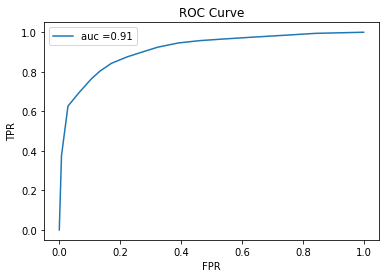

In [191]:
# roc curve

y_train_pred_prob_dt = dt_best.predict_proba(x_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_prob_dt)
auc = roc_auc_score(y_train, y_train_pred_prob_dt)
plt.plot(fpr, tpr, label="auc =%0.2f"%auc)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

Decision Tree Performance:-
1. accuracy = 83%
2. sensitivity = 84.2%
3. roc auc = 91%

Decision Tree is performing better than logistic regression

### Achieving better performance using Ensemble models
1. Use PCA to reduce the dimensionality because interpretability is not a goal anymore
2. Build Random Forest 
3. Build XGBoost model

#### Principal Component Analysis

We must Standardize the data before applying PCA so let's do that.

In [192]:
from sklearn.preprocessing import StandardScaler

In [193]:
scaler = StandardScaler()

x_train_std = scaler.fit_transform(x_train)

x_train_std = pd.DataFrame(x_train_std, columns=x_train.columns)

x_train_std.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g+3g_6,count_rech_2g+3g_7,count_rech_2g+3g_8,vol_2g+3g_mb_6,vol_2g+3g_mb_7,vol_2g+3g_mb_8,arpu_2g+3g_6,arpu_2g+3g_7,arpu_2g+3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,-0.899501,-0.678342,-0.965491,-0.278228,0.000290,-0.446947,-0.530928,-0.302864,-0.632793,-0.505440,-0.184034,-0.686137,-0.684053,-0.534096,-0.578710,-0.670625,-0.840742,-0.755266,-0.738773,-0.761137,-0.929660,-0.372970,-0.349696,-0.926257,-0.266581,-2.305272,-0.082752,0.077340,0.106174,-0.707744,-0.441156,-0.446060,-0.449154,-0.359043,-0.365555,-0.371496,-0.352215,-0.354091,-0.357484,-0.256453,-0.251574,-0.260661,0.769469,-0.2732,-0.262315,-0.256526
1,-1.016887,-0.542277,-0.832958,-0.456185,-0.457048,-0.451757,-0.642231,-0.548538,-0.531137,-0.694285,-0.628547,-0.619938,-0.715071,-0.583779,-0.636404,-0.670625,-0.544282,-0.318903,-0.981225,-0.510532,-0.805201,-1.128701,0.478660,-0.523707,-1.747706,-2.305272,0.183175,-0.811751,-0.713092,-0.707744,-0.441156,1.788541,-0.449154,-0.359043,0.188217,-0.371496,-0.352215,0.472524,-0.357484,-0.256453,1.570341,-0.260661,-0.540238,-0.2732,-0.262315,-0.256526
2,-0.788677,-0.616858,-0.993650,-0.454244,-0.398474,-0.451757,-0.455841,-0.353709,-0.641086,-0.562923,-0.468783,-0.694710,-0.268828,-0.604273,-0.593282,-0.818905,-0.544282,-0.755266,-0.760814,-0.588846,-0.960774,-0.314837,-0.297924,-1.026894,-1.895818,-0.476505,-0.082752,0.145731,-0.082888,-0.707744,-0.441156,-0.446060,-0.449154,-0.359043,-0.365555,-0.371496,-0.352215,-0.354091,-0.357484,-0.256453,-0.251574,-0.260661,-0.359734,-0.2732,-0.262315,-0.256526
3,-0.430047,-0.228630,-0.578032,-0.429591,-0.398180,-0.451757,-0.404850,-0.366116,-0.462298,-0.517485,-0.476651,-0.567554,-0.376576,-0.544544,-0.417820,-0.818905,-0.544282,-0.609812,-0.477429,-0.212939,-0.556285,0.150227,0.116254,-0.523707,-1.303368,-0.628902,0.050212,0.692864,0.673357,-0.114106,-0.441156,-0.446060,-0.449154,-0.359043,-0.365555,-0.371496,-0.352215,-0.354091,-0.357484,-0.256453,-0.251574,-0.260661,-0.254789,-0.2732,-0.262315,-0.256526
4,-0.113489,-0.521725,-0.613685,-0.378233,-0.439288,-0.428899,-0.445484,-0.506417,-0.606809,-0.547180,-0.600123,-0.657489,-0.648236,-0.693666,-0.624248,0.812171,0.345097,0.117461,-0.068096,-0.538725,-0.581176,-0.547370,-0.598203,-0.724982,0.177757,0.133084,0.715031,-0.469793,-0.587051,-0.351561,-0.048856,0.185792,-0.069336,3.849090,3.510851,2.936201,0.592464,0.361388,0.127059,-0.256453,0.271681,-0.260661,-0.606353,-0.2732,-0.262315,-0.256526


In [194]:
# transforming the test data as well

x_test_std = scaler.transform(x_test)

x_test_std = pd.DataFrame(x_test_std, columns=x_test.columns)

x_test_std.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g+3g_6,count_rech_2g+3g_7,count_rech_2g+3g_8,vol_2g+3g_mb_6,vol_2g+3g_mb_7,vol_2g+3g_mb_8,arpu_2g+3g_6,arpu_2g+3g_7,arpu_2g+3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,-0.672046,-0.760787,-0.752555,-0.339770,-0.382663,-0.365585,-0.434540,-0.527095,-0.517113,-0.480488,-0.578124,-0.557871,-0.573684,-0.568728,-0.594695,-0.374066,-0.396052,-0.464357,-0.656907,-0.682823,-0.774087,-0.547370,-0.712102,-0.724982,-0.266581,-2.305272,-0.082752,-0.401401,-0.334969,-0.707744,-0.441156,-0.44606,-0.449154,-0.359043,-0.365555,-0.371496,-0.352215,-0.354091,-0.357484,-0.256453,-0.251574,-0.260661,0.490317,-0.273200,-0.262315,-0.256526
1,0.537521,0.951479,0.356396,-0.179579,-0.305521,-0.377778,0.995336,1.522261,0.764660,0.584358,0.843454,0.286803,0.366436,0.512901,0.317561,-0.374066,-0.544282,-0.318903,0.593136,0.601527,0.594955,1.777954,1.565877,1.489039,-1.747706,-2.305272,0.183175,2.607828,-0.713092,-0.707744,-0.441156,-0.44606,-0.449154,-0.359043,-0.365555,-0.371496,-0.352215,-0.354091,-0.357484,-0.256453,-0.251574,-0.260661,1.372900,-0.273200,-0.262315,-0.256526
2,0.221046,0.644636,1.798111,-0.428565,-0.428147,-0.420435,-0.583611,-0.479657,-0.480771,-0.694285,-0.700083,-0.694710,-0.727773,-0.727859,-0.729489,-0.225786,0.196867,-0.318903,0.593136,2.167807,2.150684,2.359285,4.154489,4.004973,-1.895818,-0.476505,-0.082752,-0.811751,-0.713092,-0.707744,-0.441156,-0.44606,-0.449154,-0.359043,-0.365555,-0.371496,-0.352215,-0.354091,-0.357484,-0.256453,-0.251574,-0.260661,-0.994648,2.196894,3.285031,0.984603
3,-0.853440,-0.357439,-0.902367,-0.436734,-0.449105,-0.451757,-0.504000,0.073622,-0.555625,-0.588805,-0.217789,-0.638005,1.324132,1.180699,1.311860,-0.670625,-0.396052,-0.755266,-0.634866,-0.150288,-0.960774,0.150227,0.530432,-1.026894,-1.303368,-0.628902,0.050212,0.692864,1.177520,-0.707744,-0.441156,-0.44606,-0.449154,-0.359043,-0.365555,-0.371496,-0.352215,-0.354091,-0.357484,-0.256453,-0.251574,-0.260661,0.020166,-0.273200,-0.262315,-0.256526
4,0.134762,0.535888,0.552658,1.195650,1.782315,2.160922,-0.431847,-0.556010,-0.377122,0.502806,0.785768,1.146924,-0.529373,-0.304348,-0.137452,0.515612,-0.099593,0.117461,0.139720,0.570201,0.738082,-0.082305,0.323343,0.281391,0.177757,0.133084,0.715031,-0.127835,0.925439,0.835716,-0.441156,-0.44606,-0.449154,-0.359043,-0.365555,-0.371496,-0.352215,-0.354091,-0.357484,-0.256453,-0.251574,-0.260661,-0.800500,-0.273200,-0.262315,-0.256526


In [195]:
# importing PCA

from sklearn.decomposition import PCA

In [196]:
# object instantiation

pca = PCA(random_state=100)

In [197]:
# training the pca algorithm on train data

pca.fit(x_train_std)

PCA(random_state=100)

In [198]:
# explained variances by each principal component (46 total)

pca.explained_variance_ratio_

array([2.51994973e-01, 1.55699506e-01, 8.14483924e-02, 5.20875168e-02,
       5.15185894e-02, 3.96877701e-02, 3.29620648e-02, 2.90934088e-02,
       2.51524896e-02, 2.36410496e-02, 2.25543608e-02, 1.91843586e-02,
       1.75326484e-02, 1.60598309e-02, 1.55796467e-02, 1.47822275e-02,
       1.45883012e-02, 1.36085678e-02, 1.22333718e-02, 9.45387635e-03,
       9.20646695e-03, 8.33887054e-03, 7.58331585e-03, 7.47116730e-03,
       7.19984157e-03, 6.12730570e-03, 5.94641395e-03, 5.82226619e-03,
       5.68507656e-03, 4.93755083e-03, 4.39301153e-03, 4.01542083e-03,
       3.89349513e-03, 3.49741389e-03, 3.03463257e-03, 2.97665250e-03,
       2.48168984e-03, 2.20864960e-03, 2.19905163e-03, 1.62623894e-03,
       7.69279695e-04, 6.18519663e-04, 5.23490593e-04, 3.72690532e-04,
       1.37635585e-04, 7.09014918e-05])

#### Scree Plot

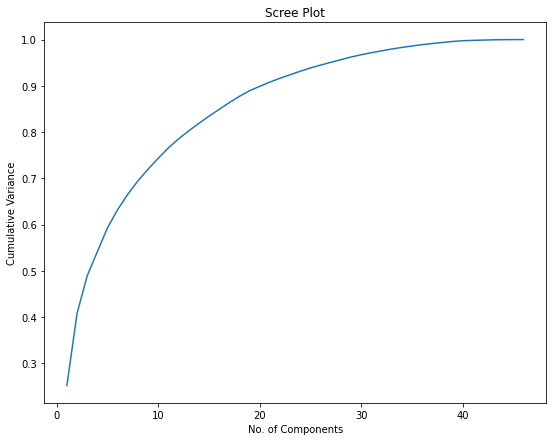

In [199]:
variance_ratio = pca.explained_variance_ratio_

variance_cumulative = np.cumsum(variance_ratio)

plt.figure(figsize=(9, 7))
plt.plot(range(1, 47), variance_cumulative)
plt.title("Scree Plot")
plt.xlabel("No. of Components")
plt.ylabel("Cumulative Variance")
plt.show()

##### Let's select 42 principal components

In [200]:
# using Incremental PCA so that only desired number of components are made, not more than that.

from sklearn.decomposition import IncrementalPCA

pca = IncrementalPCA(n_components=42)

In [201]:
# training Incremental PCA

x_train_pca = pca.fit_transform(x_train_std)

In [202]:
# again converting into a dataframe

x_train_pca = pd.DataFrame(x_train_pca, columns=[f"PC{x}" for x in range(1, 43)])

x_train_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42
0,-3.360075,0.074445,-0.826327,0.345975,-0.888377,-0.041995,-0.021112,0.096541,-0.659971,-0.343267,0.016685,0.491940,-0.608084,0.416799,0.668546,0.089148,0.155925,1.096854,-1.417588,0.395684,-0.092484,0.015771,-0.002072,0.145692,0.043203,-0.017463,-0.063579,-0.090518,-0.143305,0.077334,-0.067670,-0.006292,0.002599,0.090838,0.044515,0.004607,-0.106006,-0.110827,-0.083582,-0.066719,0.103669,0.007624
1,-3.085461,1.475030,0.004454,-0.759983,-0.904250,-0.222559,-0.566166,1.049836,-0.931641,-1.984843,0.023637,0.143222,0.607957,-0.314319,0.907522,1.185094,1.838896,0.664325,-0.686600,-0.423382,-0.326174,0.043914,-0.066638,-0.030650,-0.199385,0.789391,-0.702465,-0.272251,0.059901,-0.282566,-0.044942,-0.268033,-0.087110,-0.032580,0.100699,0.040473,0.004849,0.130675,-0.189206,-0.188198,0.092852,0.129716
2,-3.412078,0.159558,-0.546211,-0.003798,-0.585487,-0.236639,-0.284462,0.608987,-0.594336,-0.585653,0.265472,-0.246847,-0.387665,0.370993,0.656015,0.343350,0.095294,-1.044470,-0.200260,0.313686,0.071584,0.252672,0.050673,-0.148220,-0.043518,0.077986,-0.047891,0.248076,-0.168054,0.037393,-0.163720,0.029011,0.050901,0.009951,-0.186357,-0.060222,0.020479,-0.088001,-0.023219,-0.026324,0.082733,-0.077650
3,-2.296940,0.071150,-1.262792,-0.179790,-0.525153,-0.464779,0.305916,0.561557,-0.133560,-0.116800,0.239128,-0.442944,-0.071695,0.612674,0.852169,0.324769,0.083349,-0.598833,-0.304269,0.464676,0.123930,0.191405,0.135719,0.007833,0.071113,-0.007453,-0.068776,0.096688,-0.182238,0.077912,-0.070136,0.095321,0.007413,0.044920,-0.150024,-0.046184,0.097011,-0.049005,0.011878,0.047695,0.020079,-0.118616
4,-1.068765,2.002892,4.409118,0.803611,0.363793,-0.694473,3.927880,-0.064629,-1.170353,0.034819,0.270944,-0.414130,-0.141052,-0.603591,0.033972,0.863413,-0.158521,0.057956,-0.132862,-0.315896,-0.101218,0.805330,0.248190,-0.027577,-0.062676,0.123925,-0.155713,-0.013973,-0.396285,-0.309912,-0.183592,0.023907,0.143349,-0.007053,0.042532,-0.121150,-0.042832,0.126982,-0.085091,-0.192480,0.016301,0.005537


In [203]:
# transforming the test data also

x_test_pca = pca.transform(x_test_std)

x_test_pca = pd.DataFrame(x_test_pca, columns=[f"PC{x}" for x in range(1, 43)])

x_test_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42
0,-3.331768,-0.025057,-0.195617,0.270165,-0.645834,-0.147984,-0.297696,-0.419991,-0.571056,-0.460705,-0.021108,0.617856,-0.037534,0.329875,0.729535,0.052761,0.378108,1.031882,-1.129108,0.182238,0.026399,0.023177,-0.002947,0.041304,0.057997,-0.136443,-0.119315,-0.027672,-0.015023,0.152518,-0.038308,0.010946,0.074134,-0.033409,0.007895,-0.008865,0.231466,-0.064688,0.002878,-0.016783,-0.043007,0.071072
1,1.610791,-1.167604,-3.433524,0.524405,0.248992,-1.475614,0.654094,-0.748307,-1.289429,-0.402861,0.474675,0.693970,-1.107974,1.562795,0.796627,0.710647,1.544866,-0.692214,-1.723447,-0.601710,0.415124,0.234772,-0.871894,-0.081111,-1.212860,0.654586,0.104930,-0.221800,0.658534,0.048765,0.044578,-0.169769,0.252044,-0.252769,-0.072599,0.006992,-0.180246,-0.098901,-0.135113,0.026551,0.079902,-0.120486
2,1.984477,1.683780,-2.352518,-2.111854,-1.041709,-0.817933,-0.344207,0.550009,-0.828333,2.691482,-0.970323,-0.421012,3.055610,1.259296,1.859907,0.396734,0.893403,-1.670554,-0.637610,-4.365306,1.959332,0.604456,-2.209030,-0.430145,-1.055734,-0.185903,1.256916,0.172579,1.069106,-0.036164,0.339762,-0.246208,0.363369,-0.003219,-0.015017,-0.142853,0.215852,-0.515394,-0.918288,-0.319418,-0.056203,0.478412
3,-2.006052,-0.038651,-1.734400,0.546523,1.868839,0.816734,-0.054192,1.440850,-0.613091,-0.614871,0.440952,-0.694187,-0.588721,0.725449,1.096860,0.075166,-0.158128,-0.457162,-0.548188,0.688526,-0.229817,0.102965,-0.136744,-0.040312,-0.213954,-0.004653,-0.057663,0.122343,-0.261482,0.090458,-0.221686,0.082888,0.089532,-0.154436,-0.371841,-0.132950,-0.050377,-0.142867,-0.058575,-0.071572,0.154066,-0.017896
4,1.388271,-2.243018,-0.150373,-1.201013,-1.956630,1.939211,0.517477,0.168227,0.369682,0.331036,0.131246,-0.737744,0.744191,-0.331527,0.425304,0.134161,-0.255994,0.302647,-0.041273,0.404622,0.029648,0.150452,0.110056,-0.482429,0.144805,-0.094907,0.007645,-0.143542,-0.297001,-0.070163,-0.269834,-0.155551,0.201771,-0.045704,-0.003602,0.021824,-0.131088,-0.213372,-0.086124,0.283706,0.032120,-0.114718


#### Random Forest Model
- we'll use gridsearchCV

In [204]:
# making random forest object

rf = RandomForestClassifier(n_estimators=200, oob_score=True, n_jobs=-1, random_state=101, class_weight="balanced")

In [205]:
# parameters to try

params = {
    "max_depth":[10, 15, 20, 25, 30],
    "min_samples_leaf":[1000, 2000, 3000, 4000, 5000]
}

In [206]:
# instantiating grid search

gs = GridSearchCV(estimator=rf, param_grid=params, scoring="accuracy", n_jobs=-1, cv=4)

In [207]:
# fitting grid search

gs.fit(x_train_pca, y_train)

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_estimators=200, n_jobs=-1,
                                              oob_score=True,
                                              random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20, 25, 30],
                         'min_samples_leaf': [1000, 2000, 3000, 4000, 5000]},
             scoring='accuracy')

In [208]:
# best random forest 

rf_best = gs.best_estimator_

#### Evaluation

In [209]:
# predicting labels
y_train_pred_rf = rf_best.predict(x_train_pca)

# predicting probabilities
y_train_pred_prob_rf = rf_best.predict_proba(x_train_pca)[:, 1]

In [210]:
# accuracy

accuracy_score(y_train, y_train_pred_rf)

0.8040680473372781

In [211]:
# confusion matrix

confusion_matrix(y_train, y_train_pred_rf)

array([[49112, 11868],
       [ 1377,  5243]])

In [212]:
# sensitivity

cm = confusion_matrix(y_train, y_train_pred_rf)
sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
sensitivity

0.7919939577039274

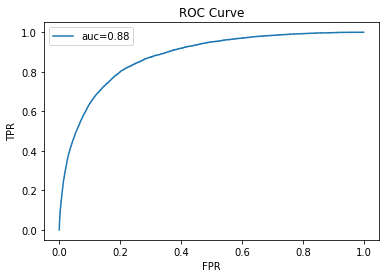

In [213]:
# roc curve

auc_score = roc_auc_score(y_train, y_train_pred_prob_rf)
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_prob_rf)
plt.plot(fpr, tpr, label="auc=%0.2f"%auc_score)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

Random Forest Performance:-
1. accuracy = 80%
2. sensitivity = 79%
3. roc auc = 88%

### XGBoost

In [214]:
# importing xgboost

import xgboost as xgb

In [215]:
# this is the class imbalance ratio we'll use in xgboost

class_imbalance_ratio = y_train[y_train == 0].shape[0] / y_train[y_train == 1].shape[0]
class_imbalance_ratio

9.211480362537765

In [216]:
# instantiating xgboost classifier object

model = xgb.XGBClassifier(scale_pos_weight=class_imbalance_ratio, random_state=100)

In [217]:
model.fit(x_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=100,
              reg_alpha=0, reg_lambda=1, ...)

In [218]:
# labels prediction

y_train_pred_xgb = model.predict(x_train_pca)

# probability prediction

y_train_pred_prob_xgb = model.predict_proba(x_train_pca)[:, 1]

In [219]:
# evaluation

# accuracy
accuracy_score(y_train, y_train_pred_xgb)

0.9411390532544379

In [220]:
# sensitivity 

cm = confusion_matrix(y_train, y_train_pred_xgb)
sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
sensitivity

0.9814199395770393

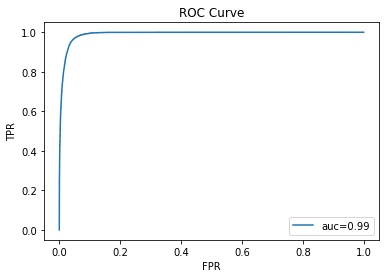

In [221]:
auc_score = roc_auc_score(y_train, y_train_pred_prob_xgb)
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_prob_xgb)
plt.plot(fpr, tpr, label="auc=%0.2f"%auc_score)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

XGBoost Performance without GridSearchCV:-
1. accuracy = 94%
2. sensitivity = 98%
3. roc auc = 99%

#### Grid Search on XGBoost

In [222]:
# model instantiation

xgb_basic = xgb.XGBClassifier(subsample=0.83, scale_pos_weight=class_imbalance_ratio, random_state=100)

In [223]:
# taking learning rate and n_estimators to test first

params = {
    "learning_rate":[0.01, 0.5, 0.1, 0.2],
    "n_estimators":[100, 200, 300, 400]
}

In [224]:
# making grid search object

gs = GridSearchCV(estimator=xgb_basic,
                 param_grid=params,
                 scoring="accuracy",
                 n_jobs=-1,
                 cv=4)

In [225]:
# training the grid search

gs.fit(x_train_pca, y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...hot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
         

In [226]:
gs.best_params_

{'learning_rate': 0.5, 'n_estimators': 400}

- The grid search is suggesting to take 400 as the number of estimators
- That's because it's not tested on test set
- Let's take 300 to prevent overfitting

In [227]:
# make xgbclassifier object with best learning rate and n_estimators combination

xgb_1 = xgb.XGBClassifier(n_estimators=300,
                         learning_rate=0.5,
                         subsample=0.83,
                         scale_pos_weight=class_imbalance_ratio,
                         random_state=100)

In [228]:
tree_params = {
    "max_depth":[5, 7, 9, 11, 13]
}

In [229]:
gs = GridSearchCV(estimator=xgb_1,
                 param_grid=tree_params,
                 scoring="accuracy",
                 n_jobs=-1,
                 cv=4)

In [230]:
gs.fit(x_train_pca, y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.5, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
     

In [231]:
gs.best_params_

{'max_depth': 13}

I tried to train the grid search for gamma, lambda and alpha paremeters but the train took too much time. 

So, I'll go with my intuition for these three parameters

In [232]:
xgb_best = xgb.XGBClassifier(n_estimators=300,
                         learning_rate=0.5,
                         max_depth=9,
                         subsample=0.83,
                         gamma=1,
                         reg_lambda=2,
                         reg_alpha=1,
                         scale_pos_weight=class_imbalance_ratio,
                         random_state=100,
                         n_jobs=-1)

In [233]:
xgb_best.fit(x_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=-1, num_parallel_tree=1, predictor='auto',
              random_state=100, reg_alpha=1, reg_lambda=2, ...)

In [234]:
# generating predictions on test set

y_test_pred = xgb_best.predict(x_test_pca)

output_df = pd.DataFrame({"id":test_df.id})

output_df["churn_probability"] = y_test_pred

output_df.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [235]:
# saving output

output_df.to_csv("/kaggle/working/output.csv", index=False)

[Business Recommendations](#Recommendations) were given after building Logistic Regression and Decision Tree Model